Evaluación de fotografías de pasaporte o visado a partir de reglamentación

## Presentación del problema

Las fotografías requeridas en pasaportes y visados tienen ciertos requisitos en lo que concierne a la iluminación, el fondo, la expresión de la cara, los accesorios, la pose y la calidad de la imagen.

Un caso ejemplar es el de los requisitos de fotografía para un pasaporte de EE. UU.:

* **Fondo**: Blanco o casi blanco.
* **Expresión facial**: Neutral, con la boca cerrada y los ojos abiertos.
* **Accesorios**: No se permiten gafas de sol, auriculares u otros objetos que obstruyan la cara.
* **Pose**: La cabeza debe estar centrada y recta, mirando directamente a la cámara.
* **Calidad de la imagen**: La imagen debe ser nítida, enfocada y tener una buena iluminación.

Cada uno de estos requisitos podría evaluarse por un modelo especializado independiente. Por ejemplo, un modelo podría analizar el color del fondo, otro podría detectar la presencia de accesorios y otro podría evaluar la expresión facial.

En el siguiente trabajo hemos propuesto una solución en base al entrenamiento de múltiples modelos, cada uno con la capacidad de decidir si alguna de estas características se cumplen o no.

Para entender mejor el problema, tomemos por ejemplo esta fotografía:

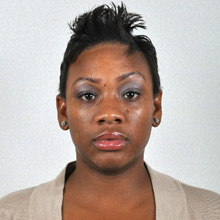

En ella se observa que la persona mantiene un rostro serio, con una postura recta hacia la cámara. La iluminación es adecuada, la imagen es nítida y el fondo es blanco. Estas son condiciones suficientes para determinar que la imagen cumple con los requisitos mínimos.

Por otro lado, observemos este caso:

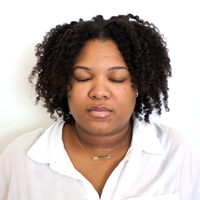

A pesar de ser una imagen nítida, con el fondo blanco y con buena iluminación, presenta un defecto; la persona tiene los ojos cerrados. Con el solo hecho de que una regla no se cumpla, es motivo suficiente para que esta imagen sea considerada inapropiada para su uso en visados y/o pasaportes.

## Respaldo del problema

**Metodología**:

Para validar la existencia del problema y la efectividad de la solución propuesta, se realizó una encuesta siguiendo la metodología Mom Test. La encuesta se llevó a cabo a través de Google Forms y contó con la participación de un grupo de 25 personas.

**Estructura de la encuesta**:

La encuesta se diseñó utilizando preguntas abiertas y cerradas, y cada pregunta se evaluó en una escala de 1 a 5. Además, se incluyó un campo de texto donde los participantes podían expresar sus propias ideas sobre cómo mejorar la idea del problema o la solución. Esto permitió recopilar información cuantitativa y cualitativa sobre la percepción del problema y la solución, así como obtener sugerencias valiosas para su refinamiento.

**Análisis de resultados**:

Los resultados de la encuesta se recopilaron y analizaron en una hoja de cálculo de Excel. Se calcularon medidas estadísticas como la media, la mediana y la desviación estándar para cada pregunta. Además, se realizó un análisis cualitativo de las respuestas abiertas, incluyendo las sugerencias expresadas en el campo de texto.

## Desarrollo de la solución

Como mencionamos anteriormente, construiremos un modelo por separado para la evaluación de cada regla que la imagen debe cumplir.

Inicialmente, pensamos que sería una mejor idea utilizar solo un modelo con la capacidad de identificar una o más clases, sin embargo, el problema se complejizó. No pudimos encontrar buenos ejemplos en la red que pudieran resolver un problema similar, por lo que descartamos esta opción. De todos modos, cada una de estas clases puede hacer una diferenciación bastante pronunciada de una imagen en particular, es decir, son clases que no son del todo interdependientes.

En la diagrama presentado a continuación, se muestra el flujo que seguiría una imagen alimentada en la aplicación que ejecutaría estos modelos, cada uno de los cuales evaluaría en paralelo diferentes características. En la etapa de salida se consideraría una evaluación de tipo and sobre cada una de las reglas, es decir, basta con que la clase de salida de un modelo haya sido considerada como mala para que la imagen se considere no opta para ser usada en un pasaporte o visado.



[![](https://mermaid.ink/img/pako:eNqNk81uEzEQgF_Fci8gJZfmtkJF0BIJqalQyy3LYdae3TX1elz_0IYkj8SJB0CiL1bvb1KpoPqyHvv7xh6vveWCJPKMl5ruRQ0usK8fc8NSU8bG8GZJgRix0kGDTCJDExxIeJubnvKxqBzYmq0uVymT9uucdx3yLb66TAaz4ECnoZx_6622FSBuK0fRyHUvZGxJRhIDiSKCpCPWkseJ-pKCEYIjCB-sQ-8VmQn91A2px9_mJUGrqg5GmWriP-vYKAPiX8ZdBK3CZuLPUyhBvoQKjeCWIA77viYfHKUJcDRjXqUVhEBPTpEfRDRyPNju-Nl8fjadbD8-Rt1UWla1BW___jmPjdXIAknw7wp3psEzh1X6vN-POUe8dXc3j792DKx19APluvvPH1JQHMp4hl_RLuX7jiKM9DWmC_Ozx4fLEDYaDzssldbZSXFazdrCbzE7WSwWQ39-r2Sos1P7cKxOKw5qUb5aHSsZ1bJ4tTqWNahl8X-Vz3iDrgEl07vZtolyHmpsMOdZ6kosIeqQ89zsEwox0M3GCJ4FF3HGo5UQ8EJBejYNz0rQHvdP8R81Xw?type=png)](https://mermaid.live/edit#pako:eNqNk81uEzEQgF_Fci8gJZfmtkJF0BIJqalQyy3LYdae3TX1elz_0IYkj8SJB0CiL1bvb1KpoPqyHvv7xh6vveWCJPKMl5ruRQ0usK8fc8NSU8bG8GZJgRix0kGDTCJDExxIeJubnvKxqBzYmq0uVymT9uucdx3yLb66TAaz4ECnoZx_6622FSBuK0fRyHUvZGxJRhIDiSKCpCPWkseJ-pKCEYIjCB-sQ-8VmQn91A2px9_mJUGrqg5GmWriP-vYKAPiX8ZdBK3CZuLPUyhBvoQKjeCWIA77viYfHKUJcDRjXqUVhEBPTpEfRDRyPNju-Nl8fjadbD8-Rt1UWla1BW___jmPjdXIAknw7wp3psEzh1X6vN-POUe8dXc3j792DKx19APluvvPH1JQHMp4hl_RLuX7jiKM9DWmC_Ozx4fLEDYaDzssldbZSXFazdrCbzE7WSwWQ39-r2Sos1P7cKxOKw5qUb5aHSsZ1bJ4tTqWNahl8X-Vz3iDrgEl07vZtolyHmpsMOdZ6kosIeqQ89zsEwox0M3GCJ4FF3HGo5UQ8EJBejYNz0rQHvdP8R81Xw)

### Construcción del conjunto de datos

Las imágenes fueron recolectadas principalmente de dos fuentes: Google Imágenes y el sitio web de stock foto Depositphotos. La elección de estas plataformas permitió acceder a una amplia variedad de fotografías que incluyen rostros de personas de diferentes zonas geográficas y en variados entornos, lo cual es crucial para asegurar la diversidad y representatividad en el dataset.

Para cada regla que el modelo necesitaba aprender, se recopilaron 50 fotos que representan el caso correcto (es decir, imágenes que cumplen con la regla específica) y otras 50 que representan el caso incorrecto (imágenes que no cumplen con la regla). Esto se hizo para cada una de las reglas a evaluar, como fondo adecuado, pose adecuada, entre otros.

Además, para probar la efectividad de cada modelo, se seleccionaron 10 fotos adicionales por regla para los casos correctos e incorrectos, respectivamente. Estas fotos de prueba son esenciales para evaluar de manera preliminar el desempeño del modelo antes de ponerlo en funcionamiento real.

Una decisión importante que tomamos fue evitar el uso de datasets pre-armados. A pesar de que estos eran más fáciles de obtener, requerían de una revisión extensa para asegurarse de que las imágenes son relevantes para el problema específico que estábamos abordando. En este caso, se prefirió recolectar las imágenes directamente de las fuentes para tener un mayor control sobre la selección y asegurar que las fotos sean realmente representativas de los casos que los modelos necesitarán evaluar.

Las fotografías fueron almacenadas en formatos comunes como .jpg, .png y .jpeg, asegurando que sean fácilmente accesibles y manejables por las bibliotecas de python para la manipulación de imágenes.

### Modelo - Rostro limpio (sin accesorios)

#### Extracción de características usando OpenCV

Vamos a cargar todas las bibliotecas necesarias para la carga y el análisis de las imágenes

In [ ]:
import cv2
import csv
import numpy as np
from os import system
import os
import glob
import pywt

Código para extraer características con OpenCV

In [ ]:
def histograma_plano(img):
	hist = cv2.calcHist([img], [0], None, [8], [0, 256])
	hist=hist.tolist()
	histograma = [elemento for sublista in hist for elemento in sublista]
	return histograma

def medidas(img):
	F1 = np.std(img)
	F2 = np.mean(img)
	F3 = np.median(img)
	return F1, F2, F3

Iniciaremos la construcción del dataset que contendrá una columna para cada característica de la imagen. Se agrega al final, la columna `is_good`, que contendrá el valor 0 para la clase `acc_face_bad`, es decir, que la imagen contiene un rostro que no está limpio de accesorios, y 1 para la clase `acc_face_good`, que indica lo contrario.

In [ ]:
Dataset=[]
columns_names=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","is_good"]
Dataset.append(columns_names)

variables = ["acc_face_bad", "acc_face_good"]

Se inicia la lectura y el análisis de todos los archivos de imágenes.

In [ ]:
dir_images = glob.glob(datasetPath + '/**/*')

print(datasetPath)

for file in dir_images:
  class_num = 0
  print('path', file)
  for i, var in enumerate(variables):
    if var in file:
        print('path contains', var)
        class_num = i
        break

  Features=[]
  # Load an image
  img = cv2.imread(file,0)
  img = cv2.resize(img, (256, 256))
  if not img is None and img.size > 0:
    f1_std_dev = np.std(img)
    f2_mean = np.mean(img)
    f3_median = np.median(img)
    hist = cv2.calcHist([img], [0], None, [8], [0, 256])
    hist=hist.tolist()
    histograma = [elemento for sublista in hist for elemento in sublista]
    cA, (cH, cV, cD) = pywt.dwt2(img, 'haar')
    f1cA, f2cA, f3cA = medidas(cA)
    f1cH, f2cH, f3cH = medidas(cH)
    f1cV, f2cV, f3cV = medidas(cV)
    f1cD, f2cD, f3cD = medidas(cD)
    Features.append(f1_std_dev)
    Features.append(f2_mean)
    Features.append(f3_median)
    Features.append(f1cA)
    Features.append(f2cA)
    Features.append(f3cA)
    Features.append(f1cH)
    Features.append(f2cH)
    Features.append(f3cH)
    Features.append(f1cV)
    Features.append(f2cV)
    Features.append(f3cV)
    Features.append(f1cD)
    Features.append(f2cD)
    Features.append(f3cD)
    for ind in range(len(histograma)):
      Features.append(histograma[ind])
    Features.append(class_num)
  else:
    print("La imagen está vacía.")
  Dataset.append(Features)

/content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Accesorios/Dataset
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Accesorios/Dataset/acc_face_good/download.jpg
path contains acc_face_good
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Accesorios/Dataset/acc_face_good/download-4.jpg
path contains acc_face_good
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Accesorios/Dataset/acc_face_good/download-5.jpg
path contains acc_face_good
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Accesorios

Confirmamos que todas las imágenes se hayan cargado correctamente (deberían haber 101 filas, 100 de las imágenes y 1 de la cabecera)

In [ ]:
len(Dataset)

101

Almacenamos los resultados del análisis en un archivo `CSV`.

In [ ]:
with open(homeworkPath + '/dataset_estructurado.csv', 'w', newline='') as archivo_csv:
    # Creamos un objeto writer
    writer = csv.writer(archivo_csv)
    for fila in Dataset:
      writer.writerow(fila)

#### Entrenamiento utilizando algoritmos clásicos de Machine Learning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

# Ajustar la semilla para asegurar repetibilidad en los resultados
np.random.seed(42)

In [ ]:
# Carga de dataset
data = pd.read_csv(homeworkPath + '/dataset_estructurado.csv')

# Verificación de cargue del dataset: cabecera
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,is_good
0,33.739877,84.802338,89.0,66.803025,169.604675,178.0,6.000376,0.054138,0.0,7.165567,...,0.0,3868.0,15563.0,16929.0,23804.0,4936.0,386.0,50.0,0.0,1
1,47.486070,132.192368,151.0,94.259170,264.384735,301.0,9.180003,0.075043,0.0,6.729764,...,0.0,5989.0,2937.0,2236.0,5904.0,30280.0,17716.0,474.0,0.0,1
2,66.104754,139.607468,154.0,131.375350,279.214935,307.0,11.927737,0.475128,0.0,8.414577,...,0.0,7310.0,4767.0,4555.0,6972.0,10987.0,12609.0,15371.0,2965.0,1
3,36.869476,169.084000,180.0,73.315177,338.167999,360.0,4.205648,0.014984,0.0,6.544218,...,0.0,1980.0,1136.0,684.0,1711.0,3512.0,51571.0,4891.0,51.0,1
4,67.949802,138.739822,172.0,135.348301,277.479645,344.5,8.020852,-0.261627,0.0,8.917012,...,0.0,10822.0,3815.0,2384.0,4040.0,7019.0,21433.0,15998.0,25.0,1
5,51.572112,196.663620,219.0,102.342145,393.327240,437.0,10.368732,-0.065765,0.0,7.163346,...,0.0,802.0,1701.0,2896.0,3066.0,3258.0,4718.0,26402.0,22693.0,1
6,50.724216,223.666931,255.0,100.616091,447.333862,510.0,6.616628,-0.045715,0.0,10.911771,...,0.0,780.0,821.0,1091.0,1625.0,2869.0,4743.0,9821.0,43786.0,1
7,63.863006,81.804947,68.0,127.172951,163.609894,136.0,9.231678,-0.131378,0.0,7.044877,...,0.0,15553.0,15171.0,19064.0,1773.0,2215.0,3450.0,7288.0,1022.0,1
8,87.343606,182.200134,254.0,174.286150,364.400269,507.0,7.907077,0.803345,0.0,8.506917,...,0.0,883.0,11574.0,6815.0,1518.0,2661.0,3323.0,3465.0,35297.0,1
9,67.055819,110.140945,101.0,133.384018,220.281891,201.5,10.615892,0.497711,0.0,8.635504,...,0.0,8516.0,15359.0,7503.0,6960.0,3885.0,11868.0,11388.0,57.0,1


In [ ]:
#obtener características generales del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f1       100 non-null    float64
 1   f2       100 non-null    float64
 2   f3       100 non-null    float64
 3   f4       100 non-null    float64
 4   f5       100 non-null    float64
 5   f6       100 non-null    float64
 6   f7       100 non-null    float64
 7   f8       100 non-null    float64
 8   f9       100 non-null    float64
 9   f10      100 non-null    float64
 10  f11      100 non-null    float64
 11  f12      100 non-null    float64
 12  f13      100 non-null    float64
 13  f14      100 non-null    float64
 14  f15      100 non-null    float64
 15  f16      100 non-null    float64
 16  f17      100 non-null    float64
 17  f18      100 non-null    float64
 18  f19      100 non-null    float64
 19  f20      100 non-null    float64
 20  f21      100 non-null    float64
 21  f22      100 non-

In [ ]:
# Librerías de modelos de ML
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Métricas para algoritmos de clasificación
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

#Partición de la data de entrenamiento
from sklearn.model_selection import train_test_split

Considerando que el conjunto de datos de entrenamiento que poseemos es pequeño, **utilizaremos solo el 10% de los datos para la pruebas**.

In [ ]:
Y = data["is_good"]
X = data.drop("is_good", axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1)

In [ ]:
"""
Valores para vble 'modelo':
svm = Support Vector Machine
rf = Random forest
knn = K-Neighbors
nb = Naive bayes
dt = Decision tree
"""
trainer=None
model="rf"
if model=="svm":
  trainer = svm()
elif model=="rf":
  trainer = RandomForestClassifier(n_estimators=100)
elif model=="knn":
  trainer = KNeighborsClassifier(n_neighbors=1)
elif model=="nb":
  trainer = GaussianNB()
elif model=="dt":
  trainer = DecisionTreeClassifier()
else:
  print("modelo no implementado")

trainer.fit(x_train,y_train)
y_pred = trainer.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



In [ ]:
MatrizConfusion = confusion_matrix(y_test,y_pred)
print(MatrizConfusion)

[[5 0]
 [2 3]]


In [ ]:
# prompt: calcular kappa con la matriz de confusión almacenada en la variable MatrizConfusion

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"El índice kappa es: {kappa}")


El índice kappa es: 0.6


Sorprendentemente, a pesar de la poca cantidad de datos de prueba, el índice kappa nos arrojó un resultado considerado como un acuerdo entre justo y moderado. Consideramos que es un resultado lo suficientemente sustantivo como para poder armar una solución en el futuro que considere esta propuesta de modelo para determinar si la existencia de accesorios en el rostro.

#### Entrenamiento de una red neuronal convolucional

In [ ]:
# Framework para interpretabilidad de una red neuronal
!pip install lime
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c4691ac207b1e864909335c1bd5859c1f05af47f274389ed366e78fc9c6146de
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# librerías para aprendizaje profundo
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Cargar los dataset de entrenamiento y prueba

train_dir = datasetPath
test_dir = testingPath

# Definir los parámetros de ejecución
batch_size = 8
total_training_samples = 100
steps_per_epoch = total_training_samples // batch_size  # Integer division

# Crear DataAugmentation para dar mayor variabilidad a las muestras

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalizar los valores, se ha demostrado que entre 0 y 1 la red puede entrenar mejor
test_datagen = ImageDataGenerator(rescale=1./255)

# Data de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Data de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Construcción del modelo de red neuronal convolucional

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compilar el modelo CNN
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=100
)

# Almacenamiento del modelo entrenado
model.save(homeworkPath + '/model_entrenado.h5')

# Métricas de validación
score = model.evaluate_generator(test_generator, steps=800)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 0.7350 - accuracy: 0.4239

12/12 [==============================] - 7s 149ms/step - loss: 0.7350 - accuracy: 0.4239 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 1s 50ms/step - loss: 0.6882 - accuracy: 0.5000
Epoch 3/10
12/12 [==============================] - 1s 42ms/step - loss: 0.6790 - accuracy: 0.5870
Epoch 4/10
12/12 [==============================] - 0s 40ms/step - loss: 0.6443 - accuracy: 0.6413
Epoch 5/10
12/12 [==============================] - 0s 38ms/step - loss: 0.6537 - accuracy: 0.7174
Epoch 6/10
12/12 [==============================] - 0s 40ms/step - loss: 0.6923 - accuracy: 0.5870
Epoch 7/10
12/12 [==============================] - 0s 39ms/step - loss: 0.6070 - accuracy: 0.6957
Epoch 8/10
12/12 [==============================] - 1s 39ms/step - loss: 0.5735 - accuracy: 0.7065
Epoch 9/10
12/12 [==============================] - 0s 41ms/step - loss: 0.5542 - accuracy: 0.8043
Epoch 10/10
12/12 [==============================] - 1s 41ms/step - loss: 0.5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-69-0cb186c0ffd3>:76: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=800)


Test loss: 0.7876039743423462
Test accuracy: 0.6000000238418579


#### Interpretabilidad de los resultados de una red neuronal convolucional con el Framework LIME

LIME (Local Interpretable Model-agnostic Explanations)

1. images[0].astype('double'):

images[0]: Selecciona la primera imagen de tu conjunto de imágenes (images).

.astype('double'): Convierte la imagen a tipo de dato double. LIME requiere que las entradas sean de tipo flotante para realizar operaciones matemáticas.

2. model.predict:

Es la función de predicción de tu modelo. LIME la usará para obtener predicciones del modelo y construir sus explicaciones.

3. top_labels=3:

Solicita que LIME genere explicaciones para las tres clases principales (las que tienen las mayores probabilidades de predicción).

4. hide_color=0:

Especifica el color que se usará para ocultar partes de la imagen durante el proceso de explicación. Un valor de 0 significa que no se ocultará ninguna parte de la imagen.

5. num_samples=1000:

Especifica el número de muestras que LIME utilizará para generar las explicaciones. Cuanto mayor sea este número, más preciso será el método LIME, pero también llevará más tiempo computacional.

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


(-0.5, 63.5, 63.5, -0.5)

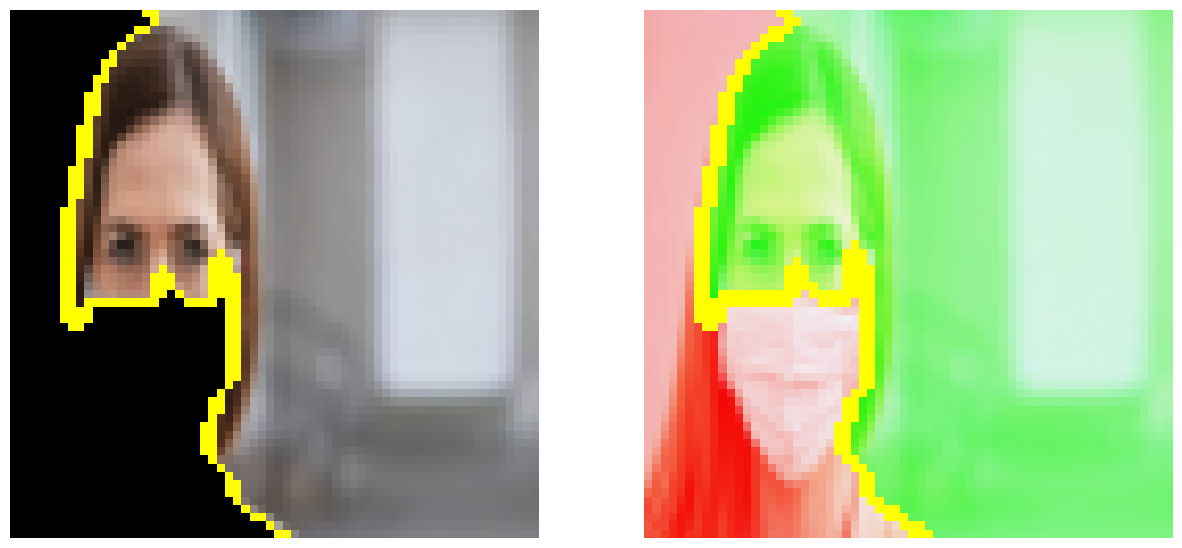

In [ ]:
from lime import lime_image
import skimage
from skimage import io
from tensorflow.keras.preprocessing import image
from skimage.segmentation import mark_boundaries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

model = keras.models.load_model(homeworkPath + '/model_entrenado.h5')

url = testingPath + '/acc_face_bad/depositphotos_392920332-stock-photo-young-woman-white-cotton-hand.jpg'

def read_and_transform_img(url):
    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (64,64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

images = read_and_transform_img(url)

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=1000)
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

### Modelo - Fondo adecuado

#### Extracción de características usando OpenCV

Vamos a cargar todas las bibliotecas necesarias para la carga y el análisis de las imágenes

In [ ]:
import cv2
import csv
import numpy as np
from os import system
import os
import glob
import pywt

Nuevamente, definimos el código para extraer las características de la imagen con OpenCV

In [ ]:
def histograma_plano(img):
	hist = cv2.calcHist([img], [0], None, [8], [0, 256])
	hist=hist.tolist()
	histograma = [elemento for sublista in hist for elemento in sublista]
	return histograma

def medidas(img):
	F1 = np.std(img)
	F2 = np.mean(img)
	F3 = np.median(img)
	return F1, F2, F3

Creamos el dataset utilizando las características obtenidas del análisis con OpenCV y la definición de una columna `is_good` para la clases.

In [ ]:
Dataset=[]
columns_names=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","is_good"]
Dataset.append(columns_names)

variables = ["background_bad", "background_good"]

In [ ]:
dir_images = glob.glob(datasetPath + '/**/*')

for file in dir_images:
  class_num = 0
  print('path', file)
  for i, var in enumerate(variables):
    if var in file:
        print('path contains', var)
        class_num = i
        break

  Features=[]
  # Load an image
  img = cv2.imread(file,0)
  img = cv2.resize(img, (256, 256))
  if not img is None and img.size > 0:
    f1_std_dev = np.std(img)
    f2_mean = np.mean(img)
    f3_median = np.median(img)
    hist = cv2.calcHist([img], [0], None, [8], [0, 256])
    hist=hist.tolist()
    histograma = [elemento for sublista in hist for elemento in sublista]
    cA, (cH, cV, cD) = pywt.dwt2(img, 'haar')
    f1cA, f2cA, f3cA = medidas(cA)
    f1cH, f2cH, f3cH = medidas(cH)
    f1cV, f2cV, f3cV = medidas(cV)
    f1cD, f2cD, f3cD = medidas(cD)
    Features.append(f1_std_dev)
    Features.append(f2_mean)
    Features.append(f3_median)
    Features.append(f1cA)
    Features.append(f2cA)
    Features.append(f3cA)
    Features.append(f1cH)
    Features.append(f2cH)
    Features.append(f3cH)
    Features.append(f1cV)
    Features.append(f2cV)
    Features.append(f3cV)
    Features.append(f1cD)
    Features.append(f2cD)
    Features.append(f3cD)
    for ind in range(len(histograma)):
      Features.append(histograma[ind])
    Features.append(class_num)
  else:
    print("La imagen está vacía.")
  Dataset.append(Features)

path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Fondo/Dataset/background_bad/depositphotos_129313586-stock-photo-african-boy-with-no-expression.jpg
path contains background_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Fondo/Dataset/background_bad/depositphotos_128200324-stock-photo-african-woman-face.jpg
path contains background_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Fondo/Dataset/background_bad/depositphotos_129174280-stock-photo-african-man-with-no-expression.jpg
path contains background_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Fondo/Dataset/background_

Comprobamos la lectura exitosa de las imágenes.

In [ ]:
len(Dataset)

101

Almacenamos el dataset en un archivo con formato `CSV`.

In [ ]:
with open(homeworkPath + '/dataset_estructurado.csv', 'w', newline='') as archivo_csv:
    # Creamos un objeto writer
    writer = csv.writer(archivo_csv)
    for fila in Dataset:
      writer.writerow(fila)

#### Entrenamiento utilizando algoritmos clásicos de Machine Learning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

# Ajustar la semilla para asegurar repetibilidad en los resultados
np.random.seed(42)

In [ ]:
# Carga de dataset
data = pd.read_csv(homeworkPath + '/dataset_estructurado.csv')

# Verificación de cargue del dataset: cabecera
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,is_good
0,75.082191,118.077087,120.0,149.541002,236.154175,238.0,10.587722,0.589966,0.0,8.205743,...,0.0,13105.0,7325.0,7628.0,6194.0,5940.0,10972.0,9906.0,4466.0,0
1,82.002165,123.812103,132.0,162.802706,247.624207,263.0,13.328399,0.039612,-0.5,13.777076,...,0.0,14016.0,6880.0,6160.0,5108.0,3925.0,8582.0,15181.0,5684.0,0
2,80.325334,128.330338,110.0,159.790547,256.660675,221.5,12.969820,0.680573,0.0,9.751184,...,0.0,7352.0,10711.0,11359.0,6210.0,4594.0,2448.0,8752.0,14110.0,0
3,73.392307,113.583420,101.0,145.982098,227.166840,202.0,12.040769,0.446198,0.0,8.844789,...,0.0,9069.0,12989.0,9186.0,7749.0,4066.0,8128.0,9789.0,4560.0,0
4,65.442833,128.367371,123.0,130.180398,256.734741,244.5,10.264892,0.203186,-0.5,8.355048,...,0.0,3490.0,8611.0,11362.0,11098.0,10654.0,4248.0,8748.0,7325.0,0
5,73.406496,117.742981,118.0,146.094427,235.485962,235.5,10.682358,0.308350,0.0,9.386154,...,0.0,10917.0,9546.0,7693.0,6403.0,7005.0,8945.0,11775.0,3252.0,0
6,77.781937,114.784637,108.0,154.929674,229.569275,215.5,11.185689,0.597961,0.0,7.936577,...,0.0,13076.0,9045.0,8588.0,5886.0,5824.0,7188.0,9657.0,6272.0,0
7,69.369863,149.785370,163.0,138.019947,299.570740,326.0,10.825945,0.021362,0.0,8.611212,...,0.0,2294.0,7829.0,8615.0,7831.0,5614.0,4256.0,20205.0,8892.0,0
8,75.508434,117.004761,107.0,150.379084,234.009521,213.5,10.905788,0.577820,0.0,7.956194,...,0.0,10882.0,9735.0,8882.0,8886.0,4109.0,6184.0,10374.0,6484.0,0
9,60.181605,188.014969,217.0,119.763150,376.029938,433.0,8.918010,0.096161,0.0,7.545004,...,0.0,688.0,2804.0,4880.0,4404.0,4464.0,5844.0,16294.0,26158.0,0


Verificamos la consistencia de las entradas. Cada imagen debe haber sido analizada.

In [ ]:
#obtener características generales del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f1       100 non-null    float64
 1   f2       100 non-null    float64
 2   f3       100 non-null    float64
 3   f4       100 non-null    float64
 4   f5       100 non-null    float64
 5   f6       100 non-null    float64
 6   f7       100 non-null    float64
 7   f8       100 non-null    float64
 8   f9       100 non-null    float64
 9   f10      100 non-null    float64
 10  f11      100 non-null    float64
 11  f12      100 non-null    float64
 12  f13      100 non-null    float64
 13  f14      100 non-null    float64
 14  f15      100 non-null    float64
 15  f16      100 non-null    float64
 16  f17      100 non-null    float64
 17  f18      100 non-null    float64
 18  f19      100 non-null    float64
 19  f20      100 non-null    float64
 20  f21      100 non-null    float64
 21  f22      100 non-

In [ ]:
# Librerías de modelos de ML
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Métricas para algoritmos de clasificación
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

#Partición de la data de entrenamiento
from sklearn.model_selection import train_test_split

Al igual que el resto de los modelos, dado a que el tamaño del dataset es pequeño, decidimos utilizar solo el 10% de los datos para el testeo.

In [ ]:
Y = data["is_good"]
X = data.drop("is_good", axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1)

In [ ]:
"""
Valores para vble 'modelo':
svm = Support Vector Machine
rf = Random forest
knn = K-Neighbors
nb = Naive bayes
dt = Decision tree
"""
trainer=None
model="rf"
if model=="svm":
  trainer = svm()
elif model=="rf":
  trainer = RandomForestClassifier(n_estimators=100)
elif model=="knn":
  trainer = KNeighborsClassifier(n_neighbors=1)
elif model=="nb":
  trainer = GaussianNB()
elif model=="dt":
  trainer = DecisionTreeClassifier()
else:
  print("modelo no implementado")

trainer.fit(x_train,y_train)
y_pred = trainer.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Los resultados son excelentes. El modelo entrenado fue capaz de distinguir entre las clases con un 100% de precisión

In [ ]:
MatrizConfusion = confusion_matrix(y_test,y_pred)
print(MatrizConfusion)

[[6 0]
 [0 4]]


No es de sorprender que el índice de kappa haya resultado con el valor 1. Esto indica un acuerdo sustancial perfecto entre los observadores.

In [ ]:
# prompt: calcular kappa con la matriz de confusión almacenada en la variable MatrizConfusion

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"El índice kappa es: {kappa}")


El índice kappa es: 1.0


#### Entrenamiento de una red neuronal convolucional

In [ ]:
# Framework para interpretabilidad de una red neuronal
!pip install lime
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c4691ac207b1e864909335c1bd5859c1f05af47f274389ed366e78fc9c6146de
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# librerías para aprendizaje profundo
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Cargar los dataset de entrenamiento y prueba

train_dir = datasetPath
test_dir = testingPath

# Definir los parámetros de ejecución
batch_size = 8
total_training_samples = 100
steps_per_epoch = total_training_samples // batch_size  # Integer division

# Crear DataAugmentation para dar mayor variabilidad a las muestras

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalizar los valores, se ha demostrado que entre 0 y 1 la red puede entrenar mejor
test_datagen = ImageDataGenerator(rescale=1./255)

# Data de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Data de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Construcción del modelo de red neuronal convolucional

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compilar el modelo CNN
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=100
)

# Almacenamiento del modelo entrenado
model.save(homeworkPath + '/model_entrenado.h5')

# Métricas de validación
score = model.evaluate_generator(test_generator, steps=800)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
11/12 [==========================>...] - ETA: 0s - loss: 0.8130 - accuracy: 0.4762

12/12 [==============================] - 14s 836ms/step - loss: 0.8040 - accuracy: 0.4565 - val_loss: 0.6845 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 1s 53ms/step - loss: 0.6855 - accuracy: 0.6196
Epoch 3/10
12/12 [==============================] - 1s 52ms/step - loss: 0.6304 - accuracy: 0.7500
Epoch 4/10
12/12 [==============================] - 1s 54ms/step - loss: 0.5673 - accuracy: 0.7065
Epoch 5/10
12/12 [==============================] - 1s 53ms/step - loss: 0.4808 - accuracy: 0.7604
Epoch 6/10
12/12 [==============================] - 1s 52ms/step - loss: 0.3320 - accuracy: 0.8696
Epoch 7/10
12/12 [==============================] - 1s 51ms/step - loss: 0.2371 - accuracy: 0.9239
Epoch 8/10
12/12 [==============================] - 1s 59ms/step - loss: 0.2872 - accuracy: 0.8804
Epoch 9/10
12/12 [==============================] - 1s 53ms/step - loss: 0.2834 - accuracy: 0.9130
Epoch 10/10
12/12 [==============================] - 1s 55ms/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-22-0cb186c0ffd3>:76: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=800)


Test loss: 0.24442584812641144
Test accuracy: 0.8500000238418579


El modelo de redes convulucionales obtuvo un sorprendente índice de 85% de precisión. De todos modos, quedó por detrás del 100% de precisión que obtuvo el algoritmo convencional de Machine Learning.

#### Interpretabilidad de los resultados de una red neuronal convolucional con el Framework LIME

En la siguiente evaluación, se utilizará una técnica para determinar qué secciones de la imagen tuvieron mayor incidencia en el resultado de la clasificación.

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


(-0.5, 63.5, 63.5, -0.5)

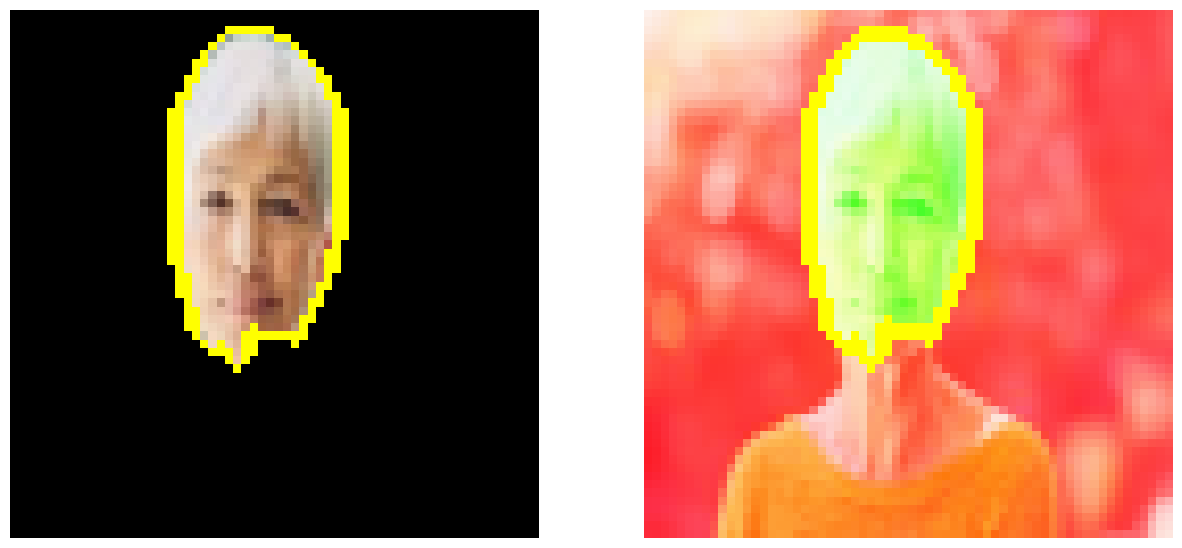

In [ ]:
from lime import lime_image
import skimage
from skimage import io
from tensorflow.keras.preprocessing import image
from skimage.segmentation import mark_boundaries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

model = keras.models.load_model(homeworkPath + '/model_entrenado.h5')

url = testingPath + '/background_bad/images-1.jpg'

def read_and_transform_img(url):
    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (64,64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

images = read_and_transform_img(url)

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=1000)
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

Como se observa en la imagen enmascarada, el fondo corresponde a la sección de la imagen con mayor impacto en la evaluación de clase como `background_bad`. Esto corresponde al comportamiento esperado.

### Modelo - Calidad adecuada

#### Extracción de características usando OpenCV

Vamos a cargar todas las bibliotecas necesarias para la carga y el análisis de las imágenes

In [ ]:
import cv2
import csv
import numpy as np
from os import system
import os
import glob
import pywt

Código para extraer características con OpenCV

In [ ]:
def histograma_plano(img):
	hist = cv2.calcHist([img], [0], None, [8], [0, 256])
	hist=hist.tolist()
	histograma = [elemento for sublista in hist for elemento in sublista]
	return histograma

def medidas(img):
	F1 = np.std(img)
	F2 = np.mean(img)
	F3 = np.median(img)
	return F1, F2, F3

Creamos el dataset con las características obtenidas con Open CV y la clase de calidad en cuestión, con 0 para `quality_bad` y 1 para `quality_good`



In [ ]:
Dataset=[]
columns_names=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","is_good"]
Dataset.append(columns_names)

variables = ["quality_bad", "quality_good"]

Iniciamos la lectura de los archivos de imágenes y la obtención de métricas de la imagen usando Open CV.

In [ ]:
dir_images = glob.glob(datasetPath + '/**/*')

for file in dir_images:
  class_num = 0
  # base_filename = os.path.basename(file)
  print('path', file)
  for i, var in enumerate(variables):
    if var in file:
        print('path contains', var)
        class_num = i
        break

  Features=[]
  # Load an image
  img = cv2.imread(file,0)
  img = cv2.resize(img, (256, 256))
  if not img is None and img.size > 0:
    f1_std_dev = np.std(img)
    f2_mean = np.mean(img)
    f3_median = np.median(img)
    hist = cv2.calcHist([img], [0], None, [8], [0, 256])
    hist=hist.tolist()
    histograma = [elemento for sublista in hist for elemento in sublista]
    cA, (cH, cV, cD) = pywt.dwt2(img, 'haar')
    f1cA, f2cA, f3cA = medidas(cA)
    f1cH, f2cH, f3cH = medidas(cH)
    f1cV, f2cV, f3cV = medidas(cV)
    f1cD, f2cD, f3cD = medidas(cD)
    Features.append(f1_std_dev)
    Features.append(f2_mean)
    Features.append(f3_median)
    Features.append(f1cA)
    Features.append(f2cA)
    Features.append(f3cA)
    Features.append(f1cH)
    Features.append(f2cH)
    Features.append(f3cH)
    Features.append(f1cV)
    Features.append(f2cV)
    Features.append(f3cV)
    Features.append(f1cD)
    Features.append(f2cD)
    Features.append(f3cD)
    for ind in range(len(histograma)):
      Features.append(histograma[ind])
    Features.append(class_num)
  else:
    print("La imagen está vacía.")
  Dataset.append(Features)

path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Calidad/Dataset/quality_bad/download.jpg
path contains quality_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Calidad/Dataset/quality_bad/download-1.jpg
path contains quality_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Calidad/Dataset/quality_bad/download-2.jpg
path contains quality_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Calidad/Dataset/quality_bad/download-3.jpg
path contains quality_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea g

Comprobamos la cantidad de entradas

In [ ]:
len(Dataset)

101

Almacenamos un archivo CSV con la información del dataset.

In [ ]:
with open(homeworkPath + '/dataset_estructurado.csv', 'w', newline='') as archivo_csv:
    # Creamos un objeto writer
    writer = csv.writer(archivo_csv)
    for fila in Dataset:
      writer.writerow(fila)

#### Entrenamiento utilizando algoritmos clásicos de Machine Learning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

# Ajustar la semilla para asegurar repetibilidad en los resultados
np.random.seed(42)

In [ ]:
# Carga de dataset
data = pd.read_csv(homeworkPath + '/dataset_estructurado.csv')

# Verificación de cargue del dataset: cabecera
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,is_good
0,52.396279,35.878601,13.0,104.611085,71.757202,27.0,5.031274,-0.090088,0.000000e+00,3.416301,...,0.0,46728.0,7760.0,3090.0,1902.0,2052.0,1672.0,2139.0,193.0,0
1,39.235576,70.240631,52.0,78.396834,140.481262,105.0,2.922428,-0.053284,0.000000e+00,1.729426,...,0.0,0.0,40401.0,10945.0,5475.0,5370.0,3345.0,0.0,0.0,0
2,69.890736,163.440475,173.0,139.671738,326.880951,346.0,4.464881,0.154999,0.000000e+00,3.207815,...,0.0,3463.0,3324.0,6324.0,7010.0,9079.0,7770.0,9039.0,19527.0,0
3,16.440056,143.349579,145.0,32.818478,286.699158,290.5,1.137436,0.067444,0.000000e+00,1.634102,...,0.0,0.0,0.0,1309.0,6827.0,52700.0,4288.0,412.0,0.0,0
4,48.447203,165.671509,164.0,96.884886,331.343018,327.5,0.920658,0.566406,5.000000e-01,0.771438,...,0.0,0.0,0.0,6696.0,10480.0,14067.0,8472.0,17011.0,8810.0,0
5,35.756907,53.493866,48.0,70.853739,106.987732,95.0,6.764453,0.175598,0.000000e+00,6.441236,...,0.0,17247.0,26630.0,11260.0,9373.0,633.0,263.0,116.0,14.0,0
6,77.661666,164.581757,185.0,152.545683,329.163513,368.0,19.696347,-0.084961,0.000000e+00,18.473939,...,0.0,6030.0,5422.0,4152.0,2927.0,5630.0,11408.0,12028.0,17939.0,0
7,64.856175,65.620361,43.0,122.341065,131.240723,89.0,21.299261,0.050171,6.661338e-16,36.145641,...,0.0,26499.0,17300.0,6121.0,3338.0,2643.0,4136.0,4183.0,1316.0,0
8,61.671693,109.907074,106.0,122.697746,219.814148,212.5,7.764943,0.006226,0.000000e+00,9.887120,...,0.0,10969.0,2951.0,10454.0,14732.0,16789.0,3987.0,2043.0,3611.0,0
9,44.572045,125.594559,134.0,88.833279,251.189117,268.0,5.365141,-0.008270,0.000000e+00,5.089950,...,0.0,5244.0,2358.0,2003.0,14054.0,33035.0,5251.0,3512.0,79.0,0


Revisamos que no hayan datos nulos, de haberlos, probablemente la biblioteca no pudo procesar alguna imagen. Como consecuencia, habría que recargar el dataset y hacer el análisis de nuevo.

In [ ]:
#obtener características generales del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f1       100 non-null    float64
 1   f2       100 non-null    float64
 2   f3       100 non-null    float64
 3   f4       100 non-null    float64
 4   f5       100 non-null    float64
 5   f6       100 non-null    float64
 6   f7       100 non-null    float64
 7   f8       100 non-null    float64
 8   f9       100 non-null    float64
 9   f10      100 non-null    float64
 10  f11      100 non-null    float64
 11  f12      100 non-null    float64
 12  f13      100 non-null    float64
 13  f14      100 non-null    float64
 14  f15      100 non-null    float64
 15  f16      100 non-null    float64
 16  f17      100 non-null    float64
 17  f18      100 non-null    float64
 18  f19      100 non-null    float64
 19  f20      100 non-null    float64
 20  f21      100 non-null    float64
 21  f22      100 non-

In [ ]:
# Librerías de modelos de ML
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Métricas para algoritmos de clasificación
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

#Partición de la data de entrenamiento
from sklearn.model_selection import train_test_split

A pesar de la cantidad pequeña de datos, y luego de un proceso de prueba y error, consideramos usar un 20% de los datos como datos de prueba. Con ellos obtuvimos los mejores resultados.

In [ ]:
Y = data["is_good"]
X = data.drop("is_good", axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [ ]:
"""
Valores para vble 'modelo':
svm = Support Vector Machine
rf = Random forest
knn = K-Neighbors
nb = Naive bayes
dt = Decision tree
"""
trainer=None
model="rf"
if model=="svm":
  trainer = svm()
elif model=="rf":
  trainer = RandomForestClassifier(n_estimators=100)
elif model=="knn":
  trainer = KNeighborsClassifier(n_neighbors=1)
elif model=="nb":
  trainer = GaussianNB()
elif model=="dt":
  trainer = DecisionTreeClassifier()
else:
  print("modelo no implementado")

trainer.fit(x_train,y_train)
y_pred = trainer.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.75      0.86         8

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



Con la matriz de confusión podemos observar que solo 2 de las imágenes de pruebas fueron clasificadas incorrectamente.

In [ ]:
MatrizConfusion = confusion_matrix(y_test,y_pred)
print(MatrizConfusion)

[[12  0]
 [ 2  6]]


El índice de Kappa resultó tener un valor de 0.78, que es muy significativo considerando que la cota superior es de 1. Estando muy arriba del valor 0 que se obtiene cuando la elección de una clase u otra es aleatoria.

In [ ]:
# prompt: calcular kappa con la matriz de confusión almacenada en la variable MatrizConfusion

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"El índice kappa es: {kappa}")


El índice kappa es: 0.7826086956521738


#### Entrenamiento de una red neuronal convolucional

In [ ]:
# Framework para interpretabilidad de una red neuronal
!pip install lime
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c4691ac207b1e864909335c1bd5859c1f05af47f274389ed366e78fc9c6146de
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# librerías para aprendizaje profundo
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Cargar los dataset de entrenamiento y prueba

train_dir = datasetPath
test_dir = testingPath

# Definir los parámetros de ejecución
batch_size = 8
total_training_samples = 100
steps_per_epoch = total_training_samples // batch_size  # Integer division

# Crear DataAugmentation para dar mayor variabilidad a las muestras

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalizar los valores, se ha demostrado que entre 0 y 1 la red puede entrenar mejor
test_datagen = ImageDataGenerator(rescale=1./255)

# Data de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Data de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Construcción del modelo de red neuronal convolucional

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compilar el modelo CNN
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=100
)

# Almacenamiento del modelo entrenado
model.save(homeworkPath + '/model_entrenado.h5')

# Métricas de validación
score = model.evaluate_generator(test_generator, steps=800)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 0.7567 - accuracy: 0.5326

12/12 [==============================] - 23s 923ms/step - loss: 0.7567 - accuracy: 0.5326 - val_loss: 0.6752 - val_accuracy: 0.5500
Epoch 2/10
12/12 [==============================] - 1s 47ms/step - loss: 0.6595 - accuracy: 0.5870
Epoch 3/10
12/12 [==============================] - 1s 45ms/step - loss: 0.6109 - accuracy: 0.6413
Epoch 4/10
12/12 [==============================] - 1s 42ms/step - loss: 0.4732 - accuracy: 0.7717
Epoch 5/10
12/12 [==============================] - 1s 46ms/step - loss: 0.3457 - accuracy: 0.8587
Epoch 6/10
12/12 [==============================] - 1s 51ms/step - loss: 0.2142 - accuracy: 0.9130
Epoch 7/10
12/12 [==============================] - 1s 48ms/step - loss: 0.2341 - accuracy: 0.9022
Epoch 8/10
12/12 [==============================] - 1s 45ms/step - loss: 0.1659 - accuracy: 0.9565
Epoch 9/10
12/12 [==============================] - 1s 46ms/step - loss: 0.1902 - accuracy: 0.9062
Epoch 10/10
12/12 [==============================] - 1s 54ms/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-20-0cb186c0ffd3>:76: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=800)


Test loss: 0.34400150179862976
Test accuracy: 0.8999999761581421


Los resultados de la red convulucional son excelentes. **Alcanzando hasta un 90% de precisión.**

#### **Implementación de la interpretabilidad para una red neuronal convolucional con el Framework LIME**

En la siguiente sección utilizaremos un algoritmo capaz de darle explicabilidad a los resultados de la red neuronal.

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step


(-0.5, 63.5, 63.5, -0.5)

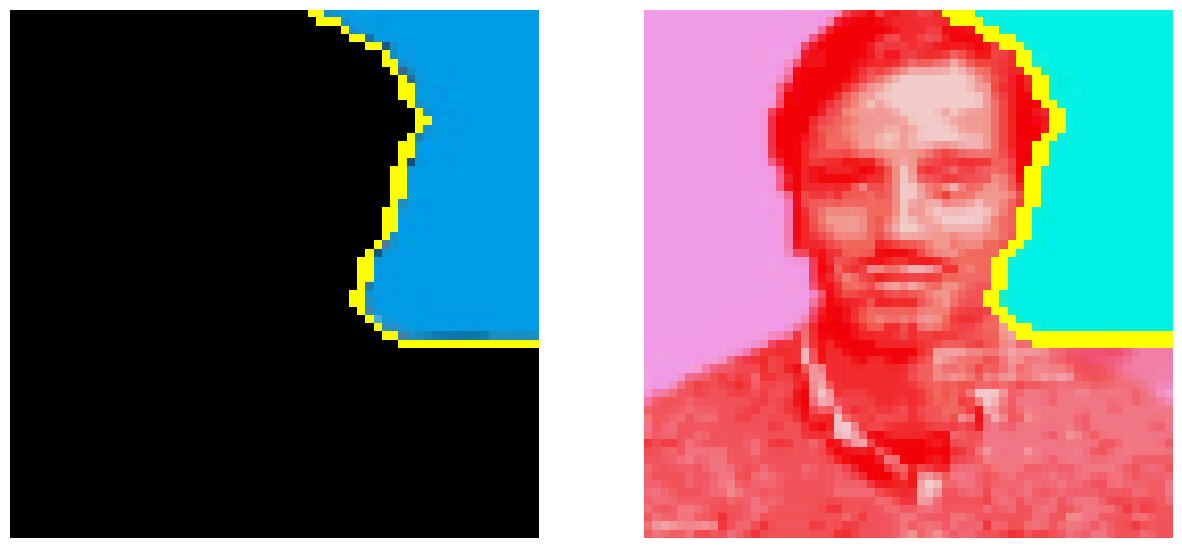

In [ ]:
from lime import lime_image
import skimage
from skimage import io
from tensorflow.keras.preprocessing import image
from skimage.segmentation import mark_boundaries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

model = keras.models.load_model(homeworkPath + '/model_entrenado.h5')

url = testingPath + '/quality_bad/download-2.jpg'

def read_and_transform_img(url):
    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (64,64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

images = read_and_transform_img(url)

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=1000)
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

En las imágenes enmascaradas, se puede observar el impacto que tuvo cada sección de la imagen en el resultado de clasificación. Es consecuente, en el sentido que el modelo determinó que la imagen del rostro pixelado es la región con mayor incidencia en la decisión de considerar la imagen con la categoría de `quality_bad`.

### Modelo - Pose adecuada

#### Extracción de características usando OpenCV

Vamos a cargar todas las bibliotecas necesarias para la carga y el análisis de las imágenes

In [ ]:
import cv2
import csv
import numpy as np
from os import system
import os
import glob
import pywt

Código para extraer características con OpenCV

In [ ]:
def histograma_plano(img):
	hist = cv2.calcHist([img], [0], None, [8], [0, 256])
	hist=hist.tolist()
	histograma = [elemento for sublista in hist for elemento in sublista]
	return histograma

def medidas(img):
	F1 = np.std(img)
	F2 = np.mean(img)
	F3 = np.median(img)
	return F1, F2, F3

Nuevamente, creamos un dataset con las características de la imagen obtenidas por OpenCV. La columna is_good almacena un valor binario, siendo 0 el correspondiente a la clase `pose_bad` y 1 a `pose_good`.

In [ ]:
Dataset=[]
columns_names=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","is_good"]
Dataset.append(columns_names)

variables = ["pose_bad", "pose_good"]

Procedemos a cargar las imágenes y a determinar sus características usando OpenCV.

In [ ]:
dir_images = glob.glob(datasetPath + '/**/*')

for file in dir_images:
  class_num = 0
  print('path', file)
  for i, var in enumerate(variables):
    if var in file:
        print('path contains', var)
        class_num = i
        break

  Features=[]
  # Load an image
  img = cv2.imread(file,0)
  img = cv2.resize(img, (256, 256))
  if not img is None and img.size > 0:
    f1_std_dev = np.std(img)
    f2_mean = np.mean(img)
    f3_median = np.median(img)
    hist = cv2.calcHist([img], [0], None, [8], [0, 256])
    hist=hist.tolist()
    histograma = [elemento for sublista in hist for elemento in sublista]
    cA, (cH, cV, cD) = pywt.dwt2(img, 'haar')
    f1cA, f2cA, f3cA = medidas(cA)
    f1cH, f2cH, f3cH = medidas(cH)
    f1cV, f2cV, f3cV = medidas(cV)
    f1cD, f2cD, f3cD = medidas(cD)
    Features.append(f1_std_dev)
    Features.append(f2_mean)
    Features.append(f3_median)
    Features.append(f1cA)
    Features.append(f2cA)
    Features.append(f3cA)
    Features.append(f1cH)
    Features.append(f2cH)
    Features.append(f3cH)
    Features.append(f1cV)
    Features.append(f2cV)
    Features.append(f3cV)
    Features.append(f1cD)
    Features.append(f2cD)
    Features.append(f3cD)
    for ind in range(len(histograma)):
      Features.append(histograma[ind])
    Features.append(class_num)
  else:
    print("La imagen está vacía.")
  Dataset.append(Features)

path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Pose/Dataset/pose_bad/depositphotos_381461200-stock-photo-head-and-shoulders-portrait-of.jpg
path contains pose_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Pose/Dataset/pose_bad/depositphotos_201090718-stock-photo-handsome-middle-age-man-happy.jpg
path contains pose_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Pose/Dataset/pose_bad/depositphotos_677099686-stock-photo-outdoor-portrait-serious-white-man.jpg
path contains pose_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Pose/Dataset/pose_bad/depositphotos_667438848-sto

Comprobamos que se hayan cargado todas las imágenes correctamente

In [ ]:
len(Dataset)

101

Almacenamos los datos del análisis en un archivo CSV.

In [ ]:
with open(homeworkPath + '/dataset_estructurado.csv', 'w', newline='') as archivo_csv:
    # Creamos un objeto writer
    writer = csv.writer(archivo_csv)
    for fila in Dataset:
      writer.writerow(fila)

#### Entrenamiento utilizando algoritmos clásicos de Machine Learning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

# Ajustar la semilla para asegurar repetibilidad en los resultados
np.random.seed(42)

Cargamos los datos del archivo CSV en un dataframe

In [ ]:
# Carga de dataset
data = pd.read_csv(homeworkPath + '/dataset_estructurado.csv')

# Verificación de cargue del dataset: cabecera
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,is_good
0,60.316029,186.565262,202.0,116.466644,373.130524,399.0,28.463697,0.255951,0.0,11.507096,...,0.0,346.0,2141.0,4316.0,6107.0,7498.0,8792.0,9200.0,27136.0,0
1,53.743966,186.909409,213.0,106.632285,373.818817,425.0,6.891269,0.293854,0.0,11.108656,...,0.0,78.0,2028.0,3662.0,5879.0,6388.0,5885.0,25531.0,16085.0,0
2,49.151449,94.005600,84.0,97.765454,188.011200,168.0,6.230456,0.148041,0.0,7.903648,...,0.0,8062.0,6958.0,24725.0,9457.0,7502.0,6724.0,2104.0,4.0,0
3,33.323301,235.293488,247.0,65.936217,470.586975,494.0,4.467283,0.032532,0.0,8.353825,...,0.0,22.0,255.0,987.0,868.0,1356.0,1728.0,2704.0,57616.0,0
4,76.026708,209.167755,255.0,151.104652,418.335510,510.0,6.432626,0.426636,0.0,15.320749,...,0.0,1868.0,3549.0,4223.0,3696.0,2855.0,1601.0,1471.0,46273.0,0
5,38.285425,214.692078,235.0,75.618948,429.384155,469.5,5.148317,0.272583,0.0,10.342606,...,0.0,32.0,262.0,576.0,1982.0,3806.0,7171.0,13822.0,37885.0,0
6,36.517895,215.356140,231.0,72.167897,430.712280,462.0,5.794552,0.159180,0.0,9.295243,...,0.0,117.0,484.0,1038.0,2134.0,2185.0,2868.0,7785.0,48925.0,0
7,66.392058,168.632111,205.0,132.069648,337.264221,410.0,6.307827,0.347351,0.0,11.831678,...,0.0,2232.0,6968.0,6240.0,1278.0,2019.0,4720.0,40493.0,1586.0,0
8,78.395641,116.925522,114.0,155.627292,233.851044,228.0,14.217216,0.054535,0.0,11.725963,...,0.0,13899.0,11138.0,4961.0,5132.0,5493.0,7203.0,11985.0,5725.0,0
9,89.918856,192.242752,255.0,178.676224,384.485504,509.0,8.906326,0.196014,0.0,17.761098,...,0.0,6635.0,6025.0,2393.0,1355.0,1403.0,2127.0,4534.0,41064.0,0


Verificamos que se hayan *parseado* correctamente

In [ ]:
#obtener características generales del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f1       100 non-null    float64
 1   f2       100 non-null    float64
 2   f3       100 non-null    float64
 3   f4       100 non-null    float64
 4   f5       100 non-null    float64
 5   f6       100 non-null    float64
 6   f7       100 non-null    float64
 7   f8       100 non-null    float64
 8   f9       100 non-null    float64
 9   f10      100 non-null    float64
 10  f11      100 non-null    float64
 11  f12      100 non-null    float64
 12  f13      100 non-null    float64
 13  f14      100 non-null    float64
 14  f15      100 non-null    float64
 15  f16      100 non-null    float64
 16  f17      100 non-null    float64
 17  f18      100 non-null    float64
 18  f19      100 non-null    float64
 19  f20      100 non-null    float64
 20  f21      100 non-null    float64
 21  f22      100 non-

Comenzamos con la construcción del modelo convencional

In [ ]:
# Librerías de modelos de ML
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Métricas para algoritmos de clasificación
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

#Partición de la data de entrenamiento
from sklearn.model_selection import train_test_split

Luego de un proceso de evaluación, determinamos que con el 15% de los datos usados como datos de entrenamiento, el modelo proporcionaba los mejores resultados.

In [ ]:
Y = data["is_good"]
X = data.drop("is_good", axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.15)

In [ ]:
"""
Valores para vble 'modelo':
svm = Support Vector Machine
rf = Random forest
knn = K-Neighbors
nb = Naive bayes
dt = Decision tree
"""
trainer=None
model="rf"
if model=="svm":
  trainer = svm()
elif model=="rf":
  trainer = RandomForestClassifier(n_estimators=100)
elif model=="knn":
  trainer = KNeighborsClassifier(n_neighbors=1)
elif model=="nb":
  trainer = GaussianNB()
elif model=="dt":
  trainer = DecisionTreeClassifier()
else:
  print("modelo no implementado")

trainer.fit(x_train,y_train)
y_pred = trainer.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.67      0.44      0.53         9

    accuracy                           0.53        15
   macro avg       0.56      0.56      0.53        15
weighted avg       0.58      0.53      0.53        15



Lamentablemente, los resultados no son lo suficientemente buenos. Con una precisón promedio de un 53%, el modelo construido con Random Forest no puede ser considerado preciso.

In [ ]:
MatrizConfusion = confusion_matrix(y_test,y_pred)
print(MatrizConfusion)

[[4 2]
 [5 4]]


El índice que Kappa no supera el 0.1, lo que está cerca de concluir a que el modelo construido no es mucho mejor que una elección aleatoria al momento de evaluar la clase de una imagen con respecto a la expresión.

In [ ]:
# prompt: calcular kappa con la matriz de confusión almacenada en la variable MatrizConfusion

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"El índice kappa es: {kappa}")


El índice kappa es: 0.10256410256410264


#### Entrenamiento de una red neuronal convolucional

Ahora analizaremos si una red neuronal convulucional es capaz de mejorar los resultados del modelo construido con Random Forest.

In [ ]:
# Framework para interpretabilidad de una red neuronal
!pip install lime
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c4691ac207b1e864909335c1bd5859c1f05af47f274389ed366e78fc9c6146de
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# librerías para aprendizaje profundo
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Cargar los dataset de entrenamiento y prueba

train_dir = datasetPath
test_dir = testingPath

# Definir los parámetros de ejecución
batch_size = 8
total_training_samples = 100
steps_per_epoch = total_training_samples // batch_size  # Integer division

# Crear DataAugmentation para dar mayor variabilidad a las muestras

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalizar los valores, se ha demostrado que entre 0 y 1 la red puede entrenar mejor
test_datagen = ImageDataGenerator(rescale=1./255)

# Data de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Data de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Construcción del modelo de red neuronal convolucional

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compilar el modelo CNN
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=100
)

# Almacenamiento del modelo entrenado
model.save(homeworkPath + '/model_entrenado.h5')

# Métricas de validación
score = model.evaluate_generator(test_generator, steps=800)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 0.8051 - accuracy: 0.5000

12/12 [==============================] - 18s 828ms/step - loss: 0.8051 - accuracy: 0.5000 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 1s 45ms/step - loss: 0.6968 - accuracy: 0.4674
Epoch 3/10
12/12 [==============================] - 1s 44ms/step - loss: 0.6972 - accuracy: 0.4565
Epoch 4/10
12/12 [==============================] - 1s 45ms/step - loss: 0.6878 - accuracy: 0.5652
Epoch 5/10
12/12 [==============================] - 1s 44ms/step - loss: 0.6807 - accuracy: 0.5761
Epoch 6/10
12/12 [==============================] - 1s 63ms/step - loss: 0.6712 - accuracy: 0.5761
Epoch 7/10
12/12 [==============================] - 1s 63ms/step - loss: 0.6466 - accuracy: 0.6630
Epoch 8/10
12/12 [==============================] - 1s 63ms/step - loss: 0.6435 - accuracy: 0.6196
Epoch 9/10
12/12 [==============================] - 1s 45ms/step - loss: 0.6294 - accuracy: 0.6630
Epoch 10/10
12/12 [==============================] - 1s 46ms/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-30-0cb186c0ffd3>:76: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=800)


Test loss: 0.7332053780555725
Test accuracy: 0.6000000238418579


Sin ser los mejores resultados, un 60% de precisión es bastante bueno considerando la poca cantidad de datos de los que se disponía. A diferencia de características más fáciles de reconocer, la pose de la persona posee muchos más detalles, diríamos, hasta mucho más específicos a diferencia de por ejemplo, la iluminación o la calidad de la imagen.

#### **Implementación de la interpretabilidad para una red neuronal convolucional con el Framework LIME**

Aunque los resultados obtenidos por los modelos no son los mejores, vamos a revisar qué determina que la red neuronal convolucional categorice a una imagen de una pose incorrecta con cierta etiqueta.

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 52ms/step


(-0.5, 63.5, 63.5, -0.5)

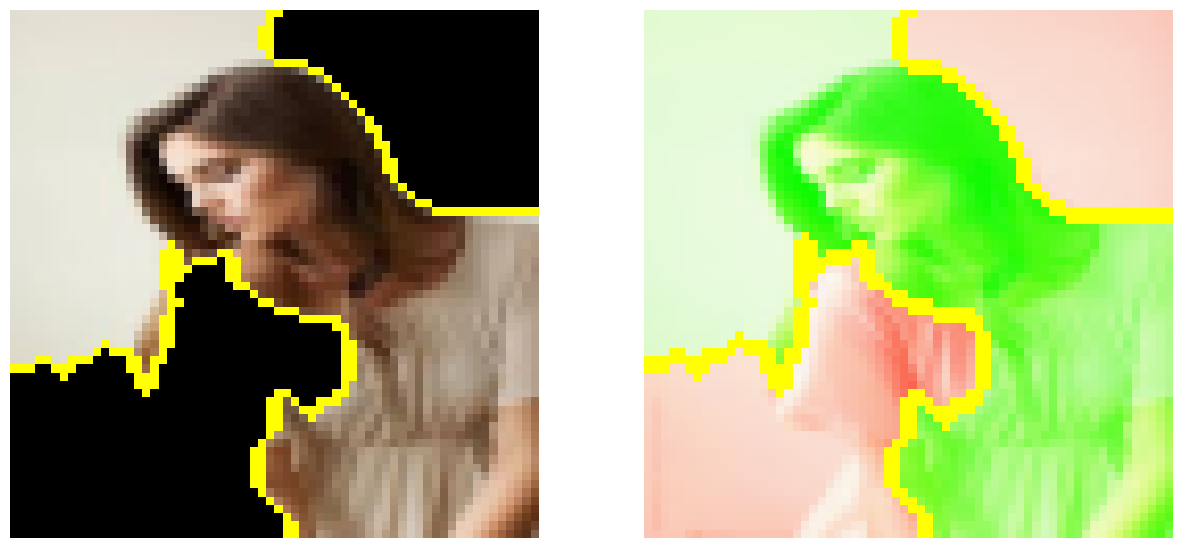

In [ ]:
from lime import lime_image
import skimage
from skimage import io
from tensorflow.keras.preprocessing import image
from skimage.segmentation import mark_boundaries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

model = keras.models.load_model(homeworkPath + '/model_entrenado.h5')

url = testingPath + '/pose_bad/images-2.jpg'

def read_and_transform_img(url):
    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (64,64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

images = read_and_transform_img(url)

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=1000)
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

Efectivamente, la red neuronal le está dando énfasis a la postura de las manos de la mujer, indicativo de que se trata de una mala postura. Sin embargo, un color rojizo pálido denota que el modelo no castiga esa sección de la imagen con la severidad que debería. Probablemente, se requiera de muchas más imágenes de poses para que ese condición cambie.

### Modelo - Iluminación adecuada

#### Extracción de características usando OpenCV

Vamos a cargar todas las bibliotecas necesarias para la carga y el análisis de las imágenes

In [ ]:
import cv2
import csv
import numpy as np
from os import system
import os
import glob
import pywt

Código para extraer características con OpenCV.

In [ ]:
def histograma_plano(img):
	hist = cv2.calcHist([img], [0], None, [8], [0, 256])
	hist=hist.tolist()
	histograma = [elemento for sublista in hist for elemento in sublista]
	return histograma

def medidas(img):
	F1 = np.std(img)
	F2 = np.mean(img)
	F3 = np.median(img)
	return F1, F2, F3

Construimos el dataset con las columnas necesarias para almacenar las características obtenidas con OpenCV. La columna de categoría is_good almacena un 0 para el caso de `lighning_bad` y un 1 para `lighning_good`.

In [ ]:
Dataset=[]
columns_names=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","is_good"]
Dataset.append(columns_names)

variables = ["lighning_bad", "lighning_good"]

Leemos las imágenes del directorio, y de paso las redimensionamos a 256x256 pixeles para estandarizarlas.

In [ ]:
dir_images = glob.glob(datasetPath + '/**/*')

for file in dir_images:
  class_num = 0
  print('path', file)
  for i, var in enumerate(variables):
    if var in file:
        print('path contains', var)
        class_num = i
        break

  Features=[]
  # Load an image
  img = cv2.imread(file,0)
  img = cv2.resize(img, (256, 256))
  if not img is None and img.size > 0:
    f1_std_dev = np.std(img)
    f2_mean = np.mean(img)
    f3_median = np.median(img)
    hist = cv2.calcHist([img], [0], None, [8], [0, 256])
    hist=hist.tolist()
    histograma = [elemento for sublista in hist for elemento in sublista]
    cA, (cH, cV, cD) = pywt.dwt2(img, 'haar')
    f1cA, f2cA, f3cA = medidas(cA)
    f1cH, f2cH, f3cH = medidas(cH)
    f1cV, f2cV, f3cV = medidas(cV)
    f1cD, f2cD, f3cD = medidas(cD)
    Features.append(f1_std_dev)
    Features.append(f2_mean)
    Features.append(f3_median)
    Features.append(f1cA)
    Features.append(f2cA)
    Features.append(f3cA)
    Features.append(f1cH)
    Features.append(f2cH)
    Features.append(f3cH)
    Features.append(f1cV)
    Features.append(f2cV)
    Features.append(f3cV)
    Features.append(f1cD)
    Features.append(f2cD)
    Features.append(f3cD)
    for ind in range(len(histograma)):
      Features.append(histograma[ind])
    Features.append(class_num)
  else:
    print("La imagen está vacía.")
  Dataset.append(Features)

path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Iluminación/Dataset/lighning_bad/images-1.jpg
path contains lighning_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Iluminación/Dataset/lighning_bad/images-4.jpg
path contains lighning_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Iluminación/Dataset/lighning_bad/images-5.jpg
path contains lighning_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Iluminación/Dataset/lighning_bad/images-6.jpg
path contains lighning_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lengua

Verificamos la lectura correcta de las imágenes

In [ ]:
len(Dataset)

101

Creamos un dataset en formato CSV.

In [ ]:
with open(homeworkPath + '/dataset_estructurado.csv', 'w', newline='') as archivo_csv:
    # Creamos un objeto writer
    writer = csv.writer(archivo_csv)
    for fila in Dataset:
      writer.writerow(fila)

#### Entrenamiento utilizando algoritmos clásicos de Machine Learning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

# Ajustar la semilla para asegurar repetibilidad en los resultados
np.random.seed(42)

Creamos un dataframe con panda a partir del archivo CSV previamente almacenado.

In [ ]:
# Carga de dataset
data = pd.read_csv(homeworkPath + '/dataset_estructurado.csv')

# Verificación de cargue del dataset: cabecera
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,is_good
0,54.446838,161.153580,150.0,108.547954,322.307159,300.00,6.513565,0.606537,0.0,5.503553,...,0.0,461.0,1897.0,4037.0,10767.0,20023.0,9000.0,5241.0,14110.0,0
1,55.101001,123.243866,162.0,109.616677,246.487732,324.00,8.608278,0.152710,0.0,7.160609,...,0.0,4540.0,11070.0,6764.0,6002.0,3006.0,33463.0,691.0,0.0,0
2,62.039627,149.114029,183.0,122.793442,298.228058,366.00,8.823344,0.287262,0.0,15.033538,...,0.0,2523.0,5448.0,8568.0,9004.0,3580.0,14576.0,17712.0,4125.0,0
3,89.336942,145.500061,141.0,178.256960,291.000122,283.00,7.194959,0.708069,0.0,9.472452,...,0.0,6253.0,12908.0,5484.0,4966.0,7572.0,4691.0,985.0,22677.0,0
4,51.122205,151.297333,169.0,101.265011,302.594666,336.50,9.845789,0.289734,0.0,9.733875,...,0.0,2514.0,3672.0,4187.0,6113.0,11962.0,24000.0,12651.0,437.0,0
5,54.589836,187.352417,214.0,107.326324,374.704834,427.00,16.464535,0.111816,0.0,10.789397,...,0.0,2138.0,1973.0,1313.0,4761.0,2365.0,8568.0,39912.0,4506.0,0
6,65.550969,109.686066,133.0,130.247318,219.372131,265.25,11.676114,0.409302,0.0,8.456670,...,0.0,15605.0,5264.0,4385.0,5567.0,17540.0,11830.0,5036.0,309.0,0
7,60.515314,154.326965,166.0,120.498749,308.653931,332.00,6.598281,0.026123,0.0,8.997959,...,0.0,1506.0,4829.0,3595.0,16089.0,5396.0,9926.0,15501.0,8694.0,0
8,63.029361,173.119843,210.0,125.628043,346.239685,420.00,7.676987,0.524109,0.0,6.740002,...,0.0,1031.0,2011.0,4770.0,12839.0,2421.0,5216.0,17986.0,19262.0,0
9,42.962246,153.704407,173.0,85.610425,307.408813,346.00,4.655948,-0.011292,0.0,5.569219,...,0.0,1326.0,2448.0,5304.0,5605.0,6140.0,40674.0,4039.0,0.0,0


Verificamos que las imágenes se hayan cargado correctamente.

In [ ]:
#obtener características generales del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f1       100 non-null    float64
 1   f2       100 non-null    float64
 2   f3       100 non-null    float64
 3   f4       100 non-null    float64
 4   f5       100 non-null    float64
 5   f6       100 non-null    float64
 6   f7       100 non-null    float64
 7   f8       100 non-null    float64
 8   f9       100 non-null    float64
 9   f10      100 non-null    float64
 10  f11      100 non-null    float64
 11  f12      100 non-null    float64
 12  f13      100 non-null    float64
 13  f14      100 non-null    float64
 14  f15      100 non-null    float64
 15  f16      100 non-null    float64
 16  f17      100 non-null    float64
 17  f18      100 non-null    float64
 18  f19      100 non-null    float64
 19  f20      100 non-null    float64
 20  f21      100 non-null    float64
 21  f22      100 non-

In [ ]:
# Librerías de modelos de ML
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Métricas para algoritmos de clasificación
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

#Partición de la data de entrenamiento
from sklearn.model_selection import train_test_split

Comenzamos construyendo el conjunto de datos de entrenamiento y de pruebas. Un 10% de los datos serán utilizados para este último proceso.

In [ ]:
Y = data["is_good"]
X = data.drop("is_good", axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1)

In [ ]:
"""
Valores para vble 'modelo':
svm = Support Vector Machine
rf = Random forest
knn = K-Neighbors
nb = Naive bayes
dt = Decision tree
"""
trainer=None
model="rf"
if model=="svm":
  trainer = svm()
elif model=="rf":
  trainer = RandomForestClassifier(n_estimators=100)
elif model=="knn":
  trainer = KNeighborsClassifier(n_neighbors=1)
elif model=="nb":
  trainer = GaussianNB()
elif model=="dt":
  trainer = DecisionTreeClassifier()
else:
  print("modelo no implementado")

trainer.fit(x_train,y_train)
y_pred = trainer.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.75      0.86         4

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



Nuevamente, y manera no sorpresiva, obtenemos altos valores de precisión en la clasificación. La iluminación parece ser una característica de alto impacto en la composición de la imagen, lo que facilita al algoritmo reconocer entre las dos clases.

In [ ]:
MatrizConfusion = confusion_matrix(y_test,y_pred)
print(MatrizConfusion)

[[6 0]
 [1 3]]


El índice de Kappa cercano a 1 nos describe la alta precisión del modelo. Muy lejos del 0, que se obtiene en la clasificación aleatoria.

In [ ]:
# prompt: calcular kappa con la matriz de confusión almacenada en la variable MatrizConfusion

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"El índice kappa es: {kappa}")


El índice kappa es: 0.7826086956521738


#### Entrenamiento de una red neuronal convolucional

Ahora analizaremos qué tan diferente puede resultar el uso de una red convulucional para este tipo de problema de clasificación.

In [ ]:
# Framework para interpretabilidad de una red neuronal
!pip install lime
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c4691ac207b1e864909335c1bd5859c1f05af47f274389ed366e78fc9c6146de
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# librerías para aprendizaje profundo
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Cargar los dataset de entrenamiento y prueba

train_dir = datasetPath
test_dir = testingPath

# Definir los parámetros de ejecución
batch_size = 8
total_training_samples = 100
steps_per_epoch = total_training_samples // batch_size  # Integer division

# Crear DataAugmentation para dar mayor variabilidad a las muestras

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalizar los valores, se ha demostrado que entre 0 y 1 la red puede entrenar mejor
test_datagen = ImageDataGenerator(rescale=1./255)

# Data de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Data de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Construcción del modelo de red neuronal convolucional

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compilar el modelo CNN
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=100
)

# Almacenamiento del modelo entrenado
model.save(homeworkPath + '/model_entrenado.h5')

# Métricas de validación
score = model.evaluate_generator(test_generator, steps=800)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
11/12 [==========================>...] - ETA: 0s - loss: 0.7038 - accuracy: 0.5000

12/12 [==============================] - 45s 3s/step - loss: 0.6993 - accuracy: 0.5109 - val_loss: 0.6263 - val_accuracy: 0.7000
Epoch 2/10
12/12 [==============================] - 1s 45ms/step - loss: 0.6010 - accuracy: 0.6957
Epoch 3/10
12/12 [==============================] - 1s 49ms/step - loss: 0.4603 - accuracy: 0.7717
Epoch 4/10
12/12 [==============================] - 1s 44ms/step - loss: 0.4345 - accuracy: 0.7826
Epoch 5/10
12/12 [==============================] - 1s 49ms/step - loss: 0.4880 - accuracy: 0.8152
Epoch 6/10
12/12 [==============================] - 1s 48ms/step - loss: 0.4394 - accuracy: 0.7935
Epoch 7/10
12/12 [==============================] - 1s 50ms/step - loss: 0.4347 - accuracy: 0.7917
Epoch 8/10
12/12 [==============================] - 1s 46ms/step - loss: 0.4089 - accuracy: 0.8261
Epoch 9/10
12/12 [==============================] - 1s 48ms/step - loss: 0.4348 - accuracy: 0.7935
Epoch 10/10
12/12 [==============================] - 1s 50ms/step - loss: 0.401

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-39-0cb186c0ffd3>:76: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=800)


Test loss: 0.4202984869480133
Test accuracy: 0.800000011920929


Con una precisión de un 80% podemos determinar que la red neuronal convulucional también entrega resultados de alta precisión. El salto de aprendizaje entre la 1 y 2 época fue sustancial. Con una conjunto de datos más grande y variado, es muy probable que este resultado obtenido sobre la precisión sea incluso mayor. Muy probablemente, algunas imágenes con ciertas condiciones de iluminación tienen solo uno o dos ejemplares.

#### **Implementación de la interpretabilidad para una red neuronal convolucional con el Framework LIME**

Ahora queremos identificar qué aspectos de la imagen utiliza la red neuronal para determinar que una fotografía tiene mala iluminación.

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


(-0.5, 63.5, 63.5, -0.5)

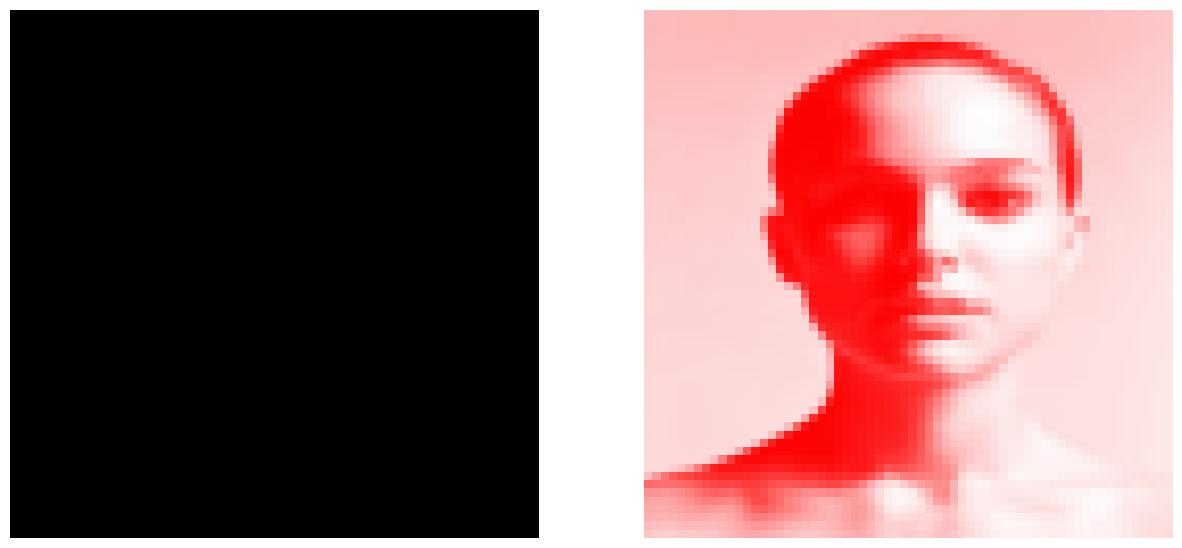

In [ ]:
from lime import lime_image
import skimage
from skimage import io
from tensorflow.keras.preprocessing import image
from skimage.segmentation import mark_boundaries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

model = keras.models.load_model(homeworkPath + '/model_entrenado.h5')

url = testingPath + '/lighning_bad/images-7.jpg'

def read_and_transform_img(url):
    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (64,64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

images = read_and_transform_img(url)

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=1000)
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

Como se puede observar, el modelo de red neuronal convolucional fue preciso en identificar qué zonas de la imagen ponderan un peso mayor en el proceso de clasificación. La zona rojo oscura indica la sombra que se proyectaba sobre el rostro de la mujer, por lo que coincide con lo que se considera como una característica de mala iluminación en la fotografía de pasaportes o visado.

### Modelo - Expresión adecuada

#### Extracción de características usando OpenCV

Vamos a cargar todas las bibliotecas necesarias para la carga y el análisis de las imágenes

In [ ]:
import cv2
import csv
import numpy as np
from os import system
import os
import glob
import pywt

Código para extraer características con OpenCV

In [ ]:
def histograma_plano(img):
	hist = cv2.calcHist([img], [0], None, [8], [0, 256])
	hist=hist.tolist()
	histograma = [elemento for sublista in hist for elemento in sublista]
	return histograma

def medidas(img):
	F1 = np.std(img)
	F2 = np.mean(img)
	F3 = np.median(img)
	return F1, F2, F3

Vamos a crear el dataset de la última característica considerada para la evaluación de una fotografía, la expresión. Partimos con los atributos obtenidos del análisis con OpenCV de la imagen y una columna de categoría is_good que indica 0 para `expression_bad` y 1 para `expression_good`.

In [ ]:
Dataset=[]
columns_names=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","is_good"]
Dataset.append(columns_names)

variables = ["expression_bad", "expression_good"]

Comenzamos la lectura y el análisis de cada una de las imágenes.

In [ ]:
dir_images = glob.glob(datasetPath + '/**/*')

for file in dir_images:
  class_num = 0
  print('path', file)
  for i, var in enumerate(variables):
    if var in file:
        print('path contains', var)
        class_num = i
        break

  Features=[]
  # Load an image
  img = cv2.imread(file,0)
  img = cv2.resize(img, (256, 256))
  if not img is None and img.size > 0:
    f1_std_dev = np.std(img)
    f2_mean = np.mean(img)
    f3_median = np.median(img)
    hist = cv2.calcHist([img], [0], None, [8], [0, 256])
    hist=hist.tolist()
    histograma = [elemento for sublista in hist for elemento in sublista]
    cA, (cH, cV, cD) = pywt.dwt2(img, 'haar')
    f1cA, f2cA, f3cA = medidas(cA)
    f1cH, f2cH, f3cH = medidas(cH)
    f1cV, f2cV, f3cV = medidas(cV)
    f1cD, f2cD, f3cD = medidas(cD)
    Features.append(f1_std_dev)
    Features.append(f2_mean)
    Features.append(f3_median)
    Features.append(f1cA)
    Features.append(f2cA)
    Features.append(f3cA)
    Features.append(f1cH)
    Features.append(f2cH)
    Features.append(f3cH)
    Features.append(f1cV)
    Features.append(f2cV)
    Features.append(f3cV)
    Features.append(f1cD)
    Features.append(f2cD)
    Features.append(f3cD)
    for ind in range(len(histograma)):
      Features.append(histograma[ind])
    Features.append(class_num)
  else:
    print("La imagen está vacía.")
  Dataset.append(Features)

path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Expresión/Dataset/expression_bad/depositphotos_644300106-stock-photo-candid-shot-pleased-attractive-female.jpg
path contains expression_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Expresión/Dataset/expression_bad/depositphotos_217657492-stock-photo-close-portrait-smiling-young-man.jpg
path contains expression_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/Versión separada/Expresión/Dataset/expression_bad/depositphotos_644517354-stock-photo-portrait-positive-attractive-red-haired.jpg
path contains expression_bad
path /content/drive/MyDrive/Estudio/Diplomado - UA AI/Curso 3 - Visión Artificial y Procesamiento de Lenguaje Natural/Tarea grupal/V

Comprobamos que todas las imágenes se hayan leido correctamente.

In [ ]:
len(Dataset)

101

Almacenamos un archivo CSV con la información recolectada en nuestro dataset.

In [ ]:
with open(homeworkPath + '/dataset_estructurado.csv', 'w', newline='') as archivo_csv:
    # Creamos un objeto writer
    writer = csv.writer(archivo_csv)
    for fila in Dataset:
      writer.writerow(fila)

#### Entrenamiento utilizando algoritmos clásicos de Machine Learning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

# Ajustar la semilla para asegurar repetibilidad en los resultados
np.random.seed(42)

Creamos un dataframe utilizando la biblioteca panda para poder entrenar nuestros modelos de Machine Learning con los datos del CSV.

In [ ]:
# Carga de dataset
data = pd.read_csv(homeworkPath + '/dataset_estructurado.csv')

# Verificación de cargue del dataset: cabecera
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,is_good
0,64.518550,155.466583,190.0,128.343103,310.933167,378.5,6.974861,0.477966,0.0,10.834849,...,0.0,954.0,11025.0,4004.0,4244.0,5680.0,7488.0,32126.0,15.0,0
1,29.383278,153.496536,166.0,58.023527,306.993073,331.5,4.459218,0.162201,0.0,7.825947,...,0.0,170.0,954.0,2543.0,6911.0,15635.0,38502.0,476.0,345.0,0
2,52.037640,137.027359,161.0,103.491696,274.054718,322.0,5.195082,0.313141,0.0,9.395527,...,0.0,6284.0,5356.0,1484.0,1659.0,15272.0,34251.0,1230.0,0.0,0
3,58.521621,149.210617,161.0,116.117371,298.421234,322.5,7.337591,0.092010,0.0,12.076990,...,0.0,1766.0,5455.0,7373.0,8045.0,9554.0,11513.0,21816.0,14.0,0
4,63.175466,93.220596,75.0,125.575016,186.441193,151.0,6.385032,-0.404816,0.0,12.035497,...,0.0,10199.0,18128.0,10388.0,8554.0,6997.0,4708.0,3037.0,3525.0,0
5,39.860226,160.264297,163.0,78.778642,320.528595,326.0,4.831840,0.082611,0.0,11.016112,...,0.0,1056.0,1564.0,1961.0,2842.0,20723.0,28402.0,5090.0,3898.0,0
6,43.419166,123.413269,122.0,85.908850,246.826538,244.5,7.099478,0.032104,0.0,10.063336,...,0.0,701.0,5029.0,10966.0,19368.0,16388.0,7760.0,5080.0,244.0,0
7,40.456860,233.318359,254.0,79.832305,466.636719,508.0,7.668923,0.091248,0.0,10.018613,...,0.0,0.0,163.0,763.0,2040.0,2628.0,3265.0,4850.0,51827.0,0
8,74.447728,198.583084,249.0,148.023738,397.166168,498.0,8.300693,0.276276,0.0,13.066538,...,0.0,2075.0,3493.0,2914.0,6303.0,3875.0,4473.0,3099.0,39304.0,0
9,58.357074,163.614105,192.0,115.792407,327.228210,384.0,7.736778,-0.016602,0.0,11.908656,...,0.0,4473.0,2905.0,2600.0,3322.0,4665.0,13271.0,31665.0,2635.0,0


Verificamos que no hayan datos nulos y que el análisis haya sido ejecutado satisfactoriamente en cada una de las imágenes.

In [ ]:
#obtener características generales del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f1       100 non-null    float64
 1   f2       100 non-null    float64
 2   f3       100 non-null    float64
 3   f4       100 non-null    float64
 4   f5       100 non-null    float64
 5   f6       100 non-null    float64
 6   f7       100 non-null    float64
 7   f8       100 non-null    float64
 8   f9       100 non-null    float64
 9   f10      100 non-null    float64
 10  f11      100 non-null    float64
 11  f12      100 non-null    float64
 12  f13      100 non-null    float64
 13  f14      100 non-null    float64
 14  f15      100 non-null    float64
 15  f16      100 non-null    float64
 16  f17      100 non-null    float64
 17  f18      100 non-null    float64
 18  f19      100 non-null    float64
 19  f20      100 non-null    float64
 20  f21      100 non-null    float64
 21  f22      100 non-

Comenzamos la creación de los modelos utilizando la biblioteca sklearn.

In [ ]:
# Librerías de modelos de ML
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Métricas para algoritmos de clasificación
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

#Partición de la data de entrenamiento
from sklearn.model_selection import train_test_split

Usamos solo un 10% de los datos, consinderando el tamaño del dataset.

In [ ]:
Y = data["is_good"]
X = data.drop("is_good", axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1)

Instanciamos los modelos de Machine Learning

In [ ]:
"""
Valores para vble 'modelo':
svm = Support Vector Machine
rf = Random forest
knn = K-Neighbors
nb = Naive bayes
dt = Decision tree
"""
trainer=None
model="rf"
if model=="svm":
  trainer = svm()
elif model=="rf":
  trainer = RandomForestClassifier(n_estimators=100)
elif model=="knn":
  trainer = KNeighborsClassifier(n_neighbors=1)
elif model=="nb":
  trainer = GaussianNB()
elif model=="dt":
  trainer = DecisionTreeClassifier()
else:
  print("modelo no implementado")

trainer.fit(x_train,y_train)
y_pred = trainer.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.50      1.00      0.67         3

    accuracy                           0.70        10
   macro avg       0.75      0.79      0.70        10
weighted avg       0.85      0.70      0.71        10



Un resultado interesante obtenemos sobre la clasificación de la expresión facial. El modelo fue capaz de clasificar sin problemas las malas expresiones, pero no así las fotografías con las expresiones de seriedad o leve sonrisa.

Con la matriz de confusión observamos ese 3 en la diagonal que indica las imágenes de clase `expression_good` clasificadas incorrectamente.

In [ ]:
MatrizConfusion = confusion_matrix(y_test,y_pred)
print(MatrizConfusion)

[[4 3]
 [0 3]]


A pesar del énfasis que pusimos en esas clasificaciones incorrectas, el índice Kappa nos sigue arrojando un resultado decente de 0.4. Lejos del 0 obtenido con la clasificación aleatoria.

In [ ]:
# prompt: calcular kappa con la matriz de confusión almacenada en la variable MatrizConfusion

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"El índice kappa es: {kappa}")


El índice kappa es: 0.44444444444444453


#### Entrenamiento de una red neuronal convolucional

Finalmente, evaluaremos las expresiones faciales utilizando una red neuronal convulucional. Iniciamos la instalación de las bibliotecas requeridas para ello.

In [ ]:
# Framework para interpretabilidad de una red neuronal
!pip install lime
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c4691ac207b1e864909335c1bd5859c1f05af47f274389ed366e78fc9c6146de
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# librerías para aprendizaje profundo
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

Utilizamos la misma arquitectura de red convulucional utilizada en los modelos anteriores, con dos salidas para identificar las clases `expression_good` y `expression_bad`.

In [ ]:
# Cargar los dataset de entrenamiento y prueba

train_dir = datasetPath
test_dir = testingPath

# Definir los parámetros de ejecución
batch_size = 8
total_training_samples = 100
steps_per_epoch = total_training_samples // batch_size  # Integer division

# Crear DataAugmentation para dar mayor variabilidad a las muestras

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalizar los valores, se ha demostrado que entre 0 y 1 la red puede entrenar mejor
test_datagen = ImageDataGenerator(rescale=1./255)

# Data de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Data de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Construcción del modelo de red neuronal convolucional

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compilar el modelo CNN
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=100
)

# Almacenamiento del modelo entrenado
model.save(homeworkPath + '/model_entrenado.h5')

# Métricas de validación
score = model.evaluate_generator(test_generator, steps=800)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 0.7614 - accuracy: 0.4565

12/12 [==============================] - 31s 2s/step - loss: 0.7614 - accuracy: 0.4565 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 1s 47ms/step - loss: 0.6974 - accuracy: 0.4891
Epoch 3/10
12/12 [==============================] - 1s 45ms/step - loss: 0.6938 - accuracy: 0.5109
Epoch 4/10
12/12 [==============================] - 1s 44ms/step - loss: 0.6892 - accuracy: 0.4891
Epoch 5/10
12/12 [==============================] - 1s 47ms/step - loss: 0.6842 - accuracy: 0.5978
Epoch 6/10
12/12 [==============================] - 1s 45ms/step - loss: 0.6668 - accuracy: 0.5833
Epoch 7/10
12/12 [==============================] - 1s 45ms/step - loss: 0.6271 - accuracy: 0.6304
Epoch 8/10
12/12 [==============================] - 1s 45ms/step - loss: 0.6576 - accuracy: 0.6413
Epoch 9/10
12/12 [==============================] - 1s 45ms/step - loss: 0.6133 - accuracy: 0.7174
Epoch 10/10
12/12 [==============================] - 1s 44ms/step - loss: 0.588

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-25-0cb186c0ffd3>:76: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=800)


Test loss: 0.7064130902290344
Test accuracy: 0.6000000238418579


La poca variabilidad de los resultados de precisión en cada época de entrenamiento, indica que el modelo no fue capaz, con las imágenes de entrenamiento, de mejorar significativamente la clasificación de las imágenes. Al igual que con el problema de las poses, el problema de detección de expresiones muy probablemente require de una cantidad mucho más significativa de datos, puesto que los detalles en las expresiones humanas son muchos y muy diversos.

#### **Implementación de la interpretabilidad para una red neuronal convolucional con el Framework LIME**

Para finalizar con la etapa de desarrollo de modelos, vamos a ejecutar un algoritmo capaz de determinar qué zonas de una imagen en particular justifican la decisión del modelo de redes convulucionales de determinar una categoría en particular. Utilizaremos una imagen que describe una expresión facial considerada inadecuada para la fotografía de visado y/o pasaporte.

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


(-0.5, 63.5, 63.5, -0.5)

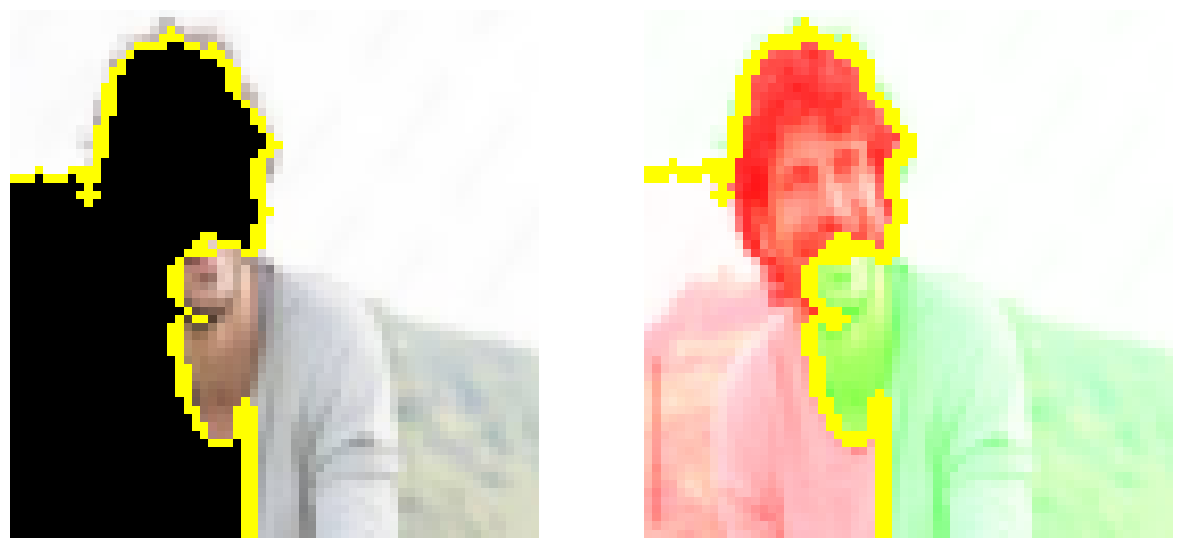

In [ ]:
from lime import lime_image
import skimage
from skimage import io
from tensorflow.keras.preprocessing import image
from skimage.segmentation import mark_boundaries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

model = keras.models.load_model(homeworkPath + '/model_entrenado.h5')

url = testingPath + '/expression_bad/download-3.jpg'

def read_and_transform_img(url):
    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (64,64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

images = read_and_transform_img(url)

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=1000)
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

El resultado de la imagen enmascarada nos indica que es el rostro del individuo la zona de mayor preponderancia para la clasificación de la imagen. En este caso, consideramos que es un resultado concordante, pues es en los ojos y las mejillas en donde se esboza la felicidad del individuo en esta fotografía.

## Conclusión

Se ha establecido una sólida base para futuras investigaciones y desarrollo en la evaluación automática de fotografías para documentos legales. A medida que avanzamos, es vital que continúe la innovación en el desarrollo de modelos más avanzados y en la creación de conjuntos de datos más inclusivos y representativos. El progreso continuo en estas áreas será fundamental para superar los desafíos existentes y para maximizar el potencial de las tecnologías de IA en mejorar la seguridad y eficiencia de los procesos críticos.

## Acerca del trabajo


Este estudio abordó la evaluación de fotografías de pasaporte o visado a través de un enfoque modular, donde se diseñaron múltiples modelos especializados para cada requisito de imagen específico. A pesar de las consideraciones iniciales de desarrollar un modelo único capaz de clasificar múltiples características, se identificaron limitaciones significativas relacionadas con la complejidad y la especificidad de las tareas, lo que llevó a la adopción de una estrategia de múltiples modelos.

La construcción del conjunto de datos fue una fase crucial en nuestra investigación. Optandose por recolectar imágenes de fuentes diversificadas, como Google Imágenes y Depositphotos, evitando el uso de conjuntos de datos predefinidos que, aunque más accesibles, a menudo no se ajustan perfectamente a los requisitos específicos de nuestra investigación. La elección de estas plataformas permitió acceder a un espectro más amplio de variaciones en términos de rasgos faciales, entornos y calidades de imagen, lo que es vital para la robustez del modelo (Deng, J., et al., 2009).

Para cada criterio, se recolectaron 100 imágenes (50 cumpliendo la regla y 50 que no), además de un conjunto de prueba de 20 imágenes para evaluar la precisión del modelo en condiciones controladas. Este enfoque no solo garantiza que los modelos se entrenen y validen con datos representativos, sino también que cualquier sesgo potencial pueda identificarse y mitigarse eficazmente (Buolamwini, J., & Gebru, T., 2018).

La interpretación de los resultados se realizó mediante el uso del framework LIME, lo que proporcionó insights valiosos sobre la toma de decisiones del modelo, especialmente en casos de error. Esta transparencia es esencial para la aceptación de sistemas de IA en aplicaciones críticas, como la documentación legal y la seguridad fronteriza.

En resumen, nuestra investigación demostró que la utilización de técnicas de visión por computadora y aprendizaje automático para la evaluación automática de fotografías de pasaporte es viable y eficiente, pero también destaca la necesidad de una mejora continua en los modelos para adaptarse a los cambios en las normativas y las variaciones en las características de las entradas.

# Reflexion


A pesar de los avances, los resultados del estudio también han direccionado el camino hacia numerosas mejoras posibles. Particularmente, las dificultades encontradas en la modelación de ciertas características complejas sugieren que el perfeccionamiento de los algoritmos y la expansión de los conjuntos de datos son imperativos. Estos desafíos no solo subrayan la necesidad de una ingeniería de modelos más refinada, sino, también la importancia de adaptar continuamente las técnicas a las exigencias de las normativas globales y los avances tecnológicos.

Tambien, el uso del framework LIME para interpretar las decisiones del modelo añadió una capa crucial de transparencia y explicabilidad, aspectos esenciales para la implementación de cualquier sistema de IA en el ámbito legal y de seguridad. Aunque esto proporcionó valiosas percepciones sobre las operaciones del modelo, también destacó la necesidad de seguir trabajando para alcanzar niveles más altos de precisión y fiabilidad.

### Resultados de la muestra

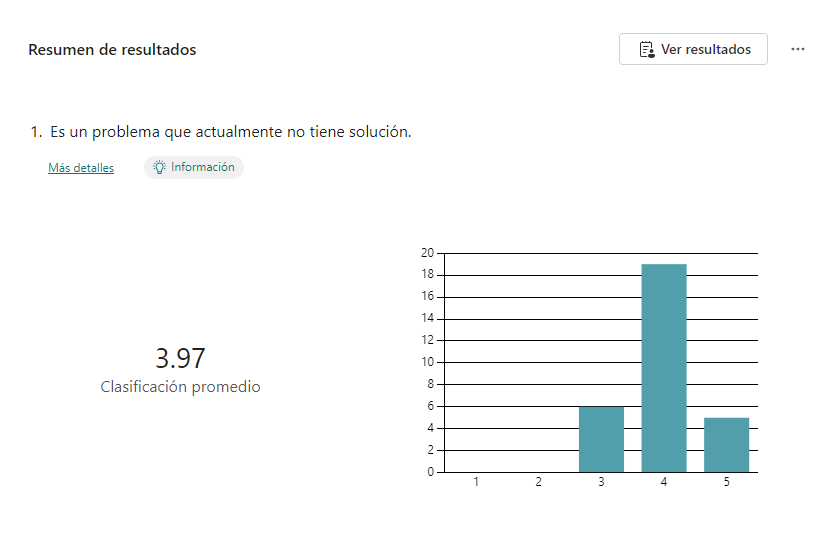

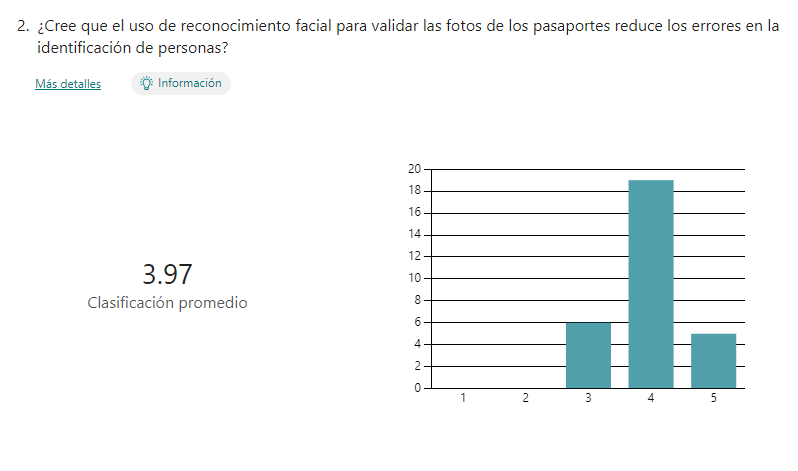

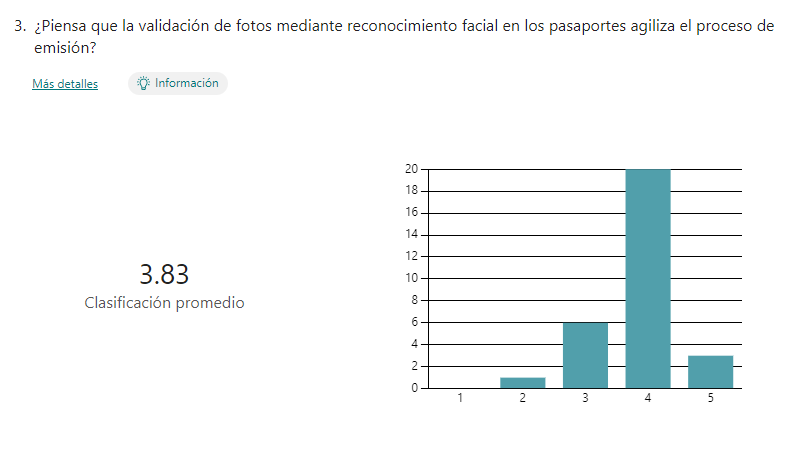

# Bibliografía

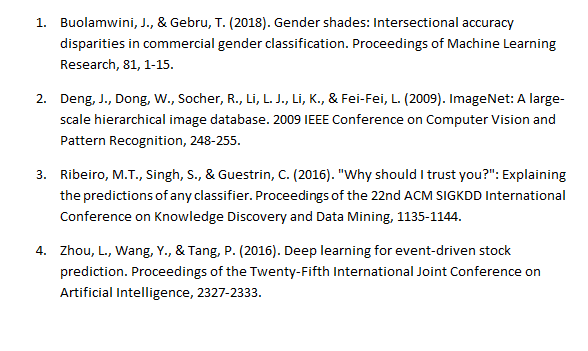!